# Retail Task

## By: Ahmed Eraki

## Mail : ahmedmohamed9667@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ahmed9667/GRIPAUGUST24/main/Retail/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
# Check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values so data is clean and prepared to analyze

In [4]:
df.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Exploratory Data Analysis 

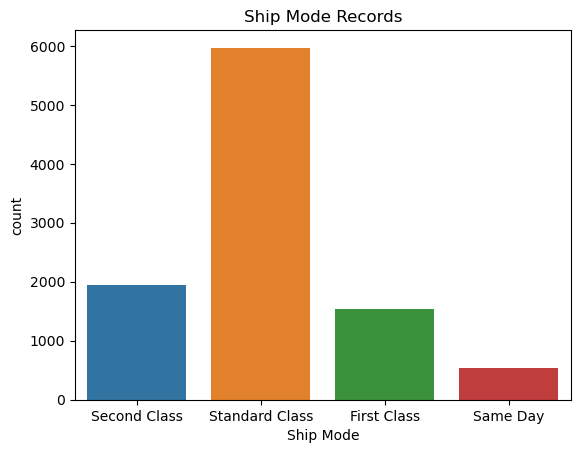

In [6]:
sns.countplot(x= df['Ship Mode'])
plt.title('Ship Mode Records')
plt.show()

Standard Class Cargo is the highest obtained in United States while delivering cargo at the same day is the lowest standard

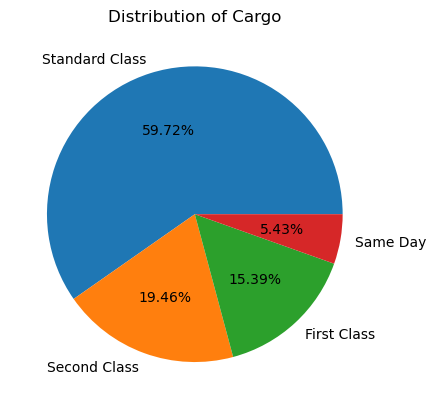

In [7]:
plt.pie(x=df['Ship Mode'].value_counts() , labels=df['Ship Mode'].value_counts().index , autopct='%0.2f%%')
plt.title('Distribution of Cargo')
plt.show()

More than half of cargos are Standard Class and the second class is the second percentage while delivering cargo at the same day is the lowest percentage 

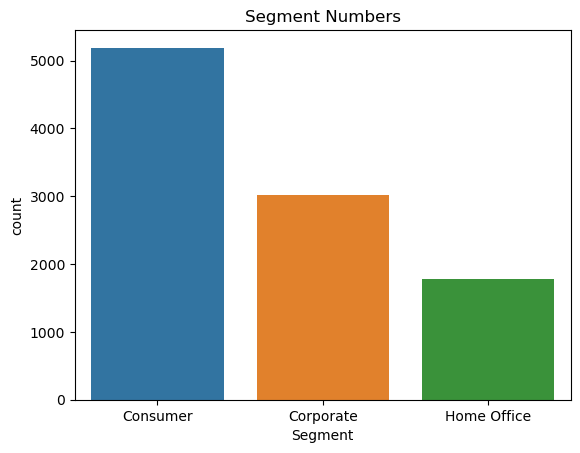

In [8]:
sns.countplot(x= df['Segment'])
plt.title('Segment Numbers')
plt.show()

Consumer segment is the most trendy in United States while Homw Office segment is the lowest preferred

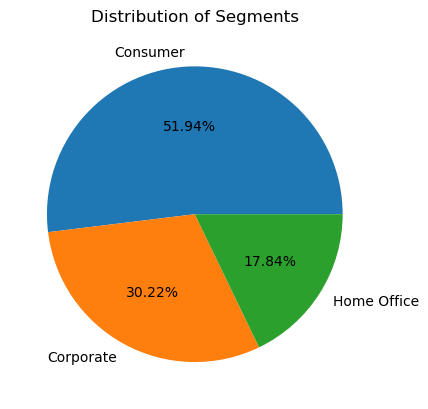

In [9]:
plt.pie(x=df['Segment'].value_counts() , labels=df['Segment'].value_counts().index , autopct='%0.2f%%')
plt.title('Distribution of Segments')
plt.show()

Half of used segments in United Satets is the consumer

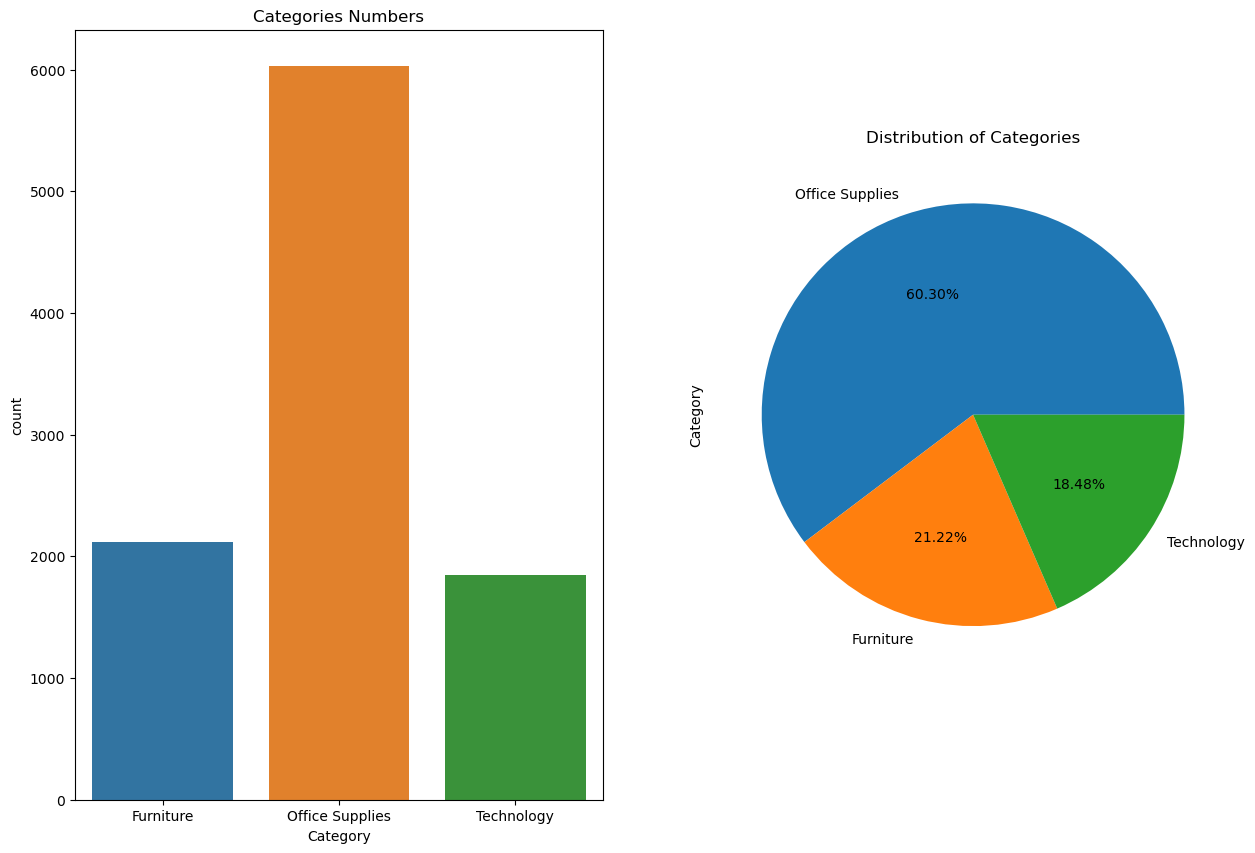

In [10]:
fig , axx = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=df['Category'] , ax=axx[0])
axx[0].set_title('Categories Numbers')

df['Category'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axx[1])
axx[1].set_title('Distribution of Categories')

plt.show()

- Office Supplies Category is the most shipped cargo in the united states while furniture in the second place and technology is the third
- 60 % of shipped cargos are office supplies while 21.22% of them are Furniture and 18.48 % are Technology Cargos

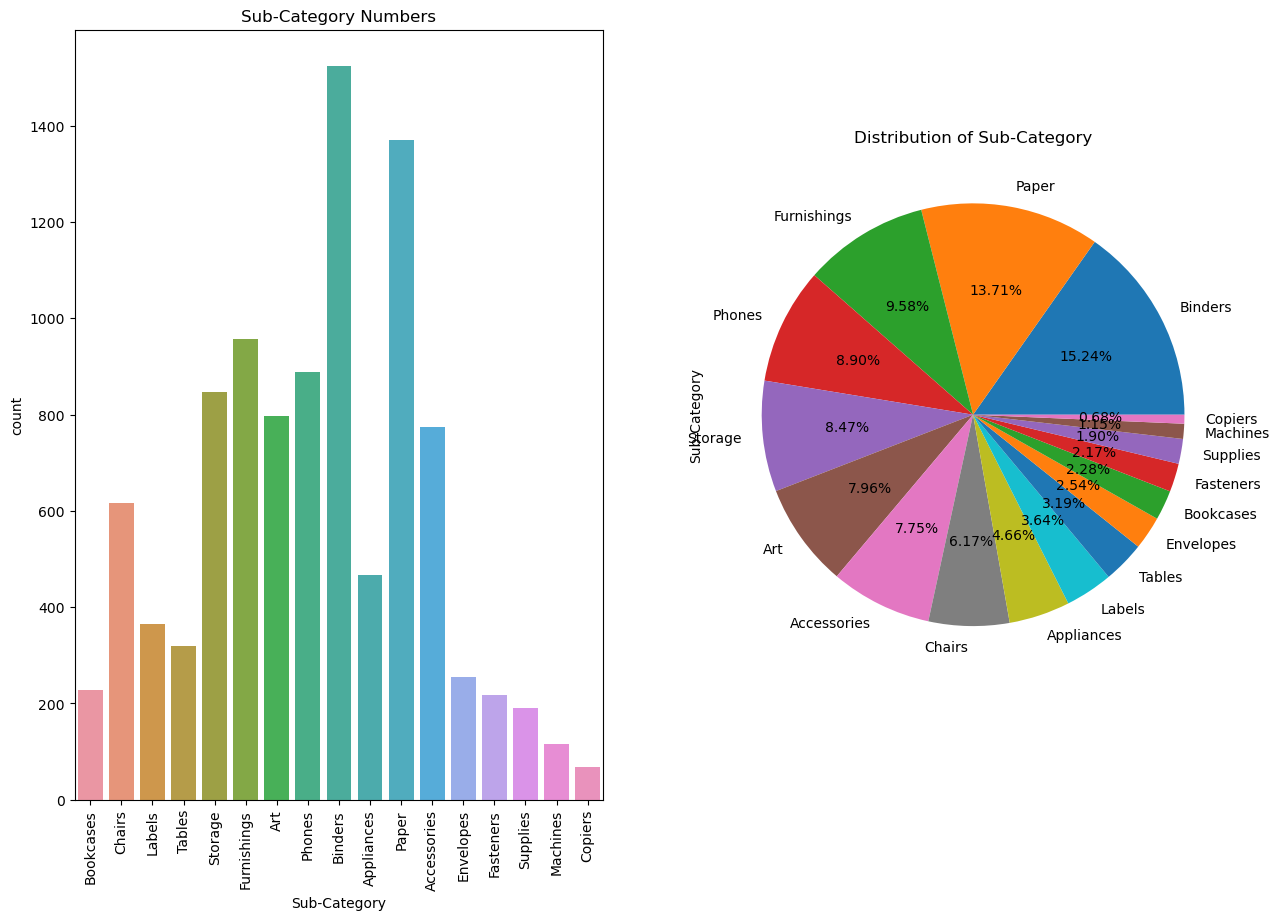

In [11]:
fig , axx = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=df['Sub-Category'] , ax=axx[0])
axx[0].set_title('Sub-Category Numbers')
axx[0].tick_params(axis='x', labelrotation = 90)

df['Sub-Category'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axx[1])
axx[1].set_title('Distribution of Sub-Category')

plt.show()

Blinders is the most used sub practical and home categories in the united states while copiers are the lowest used

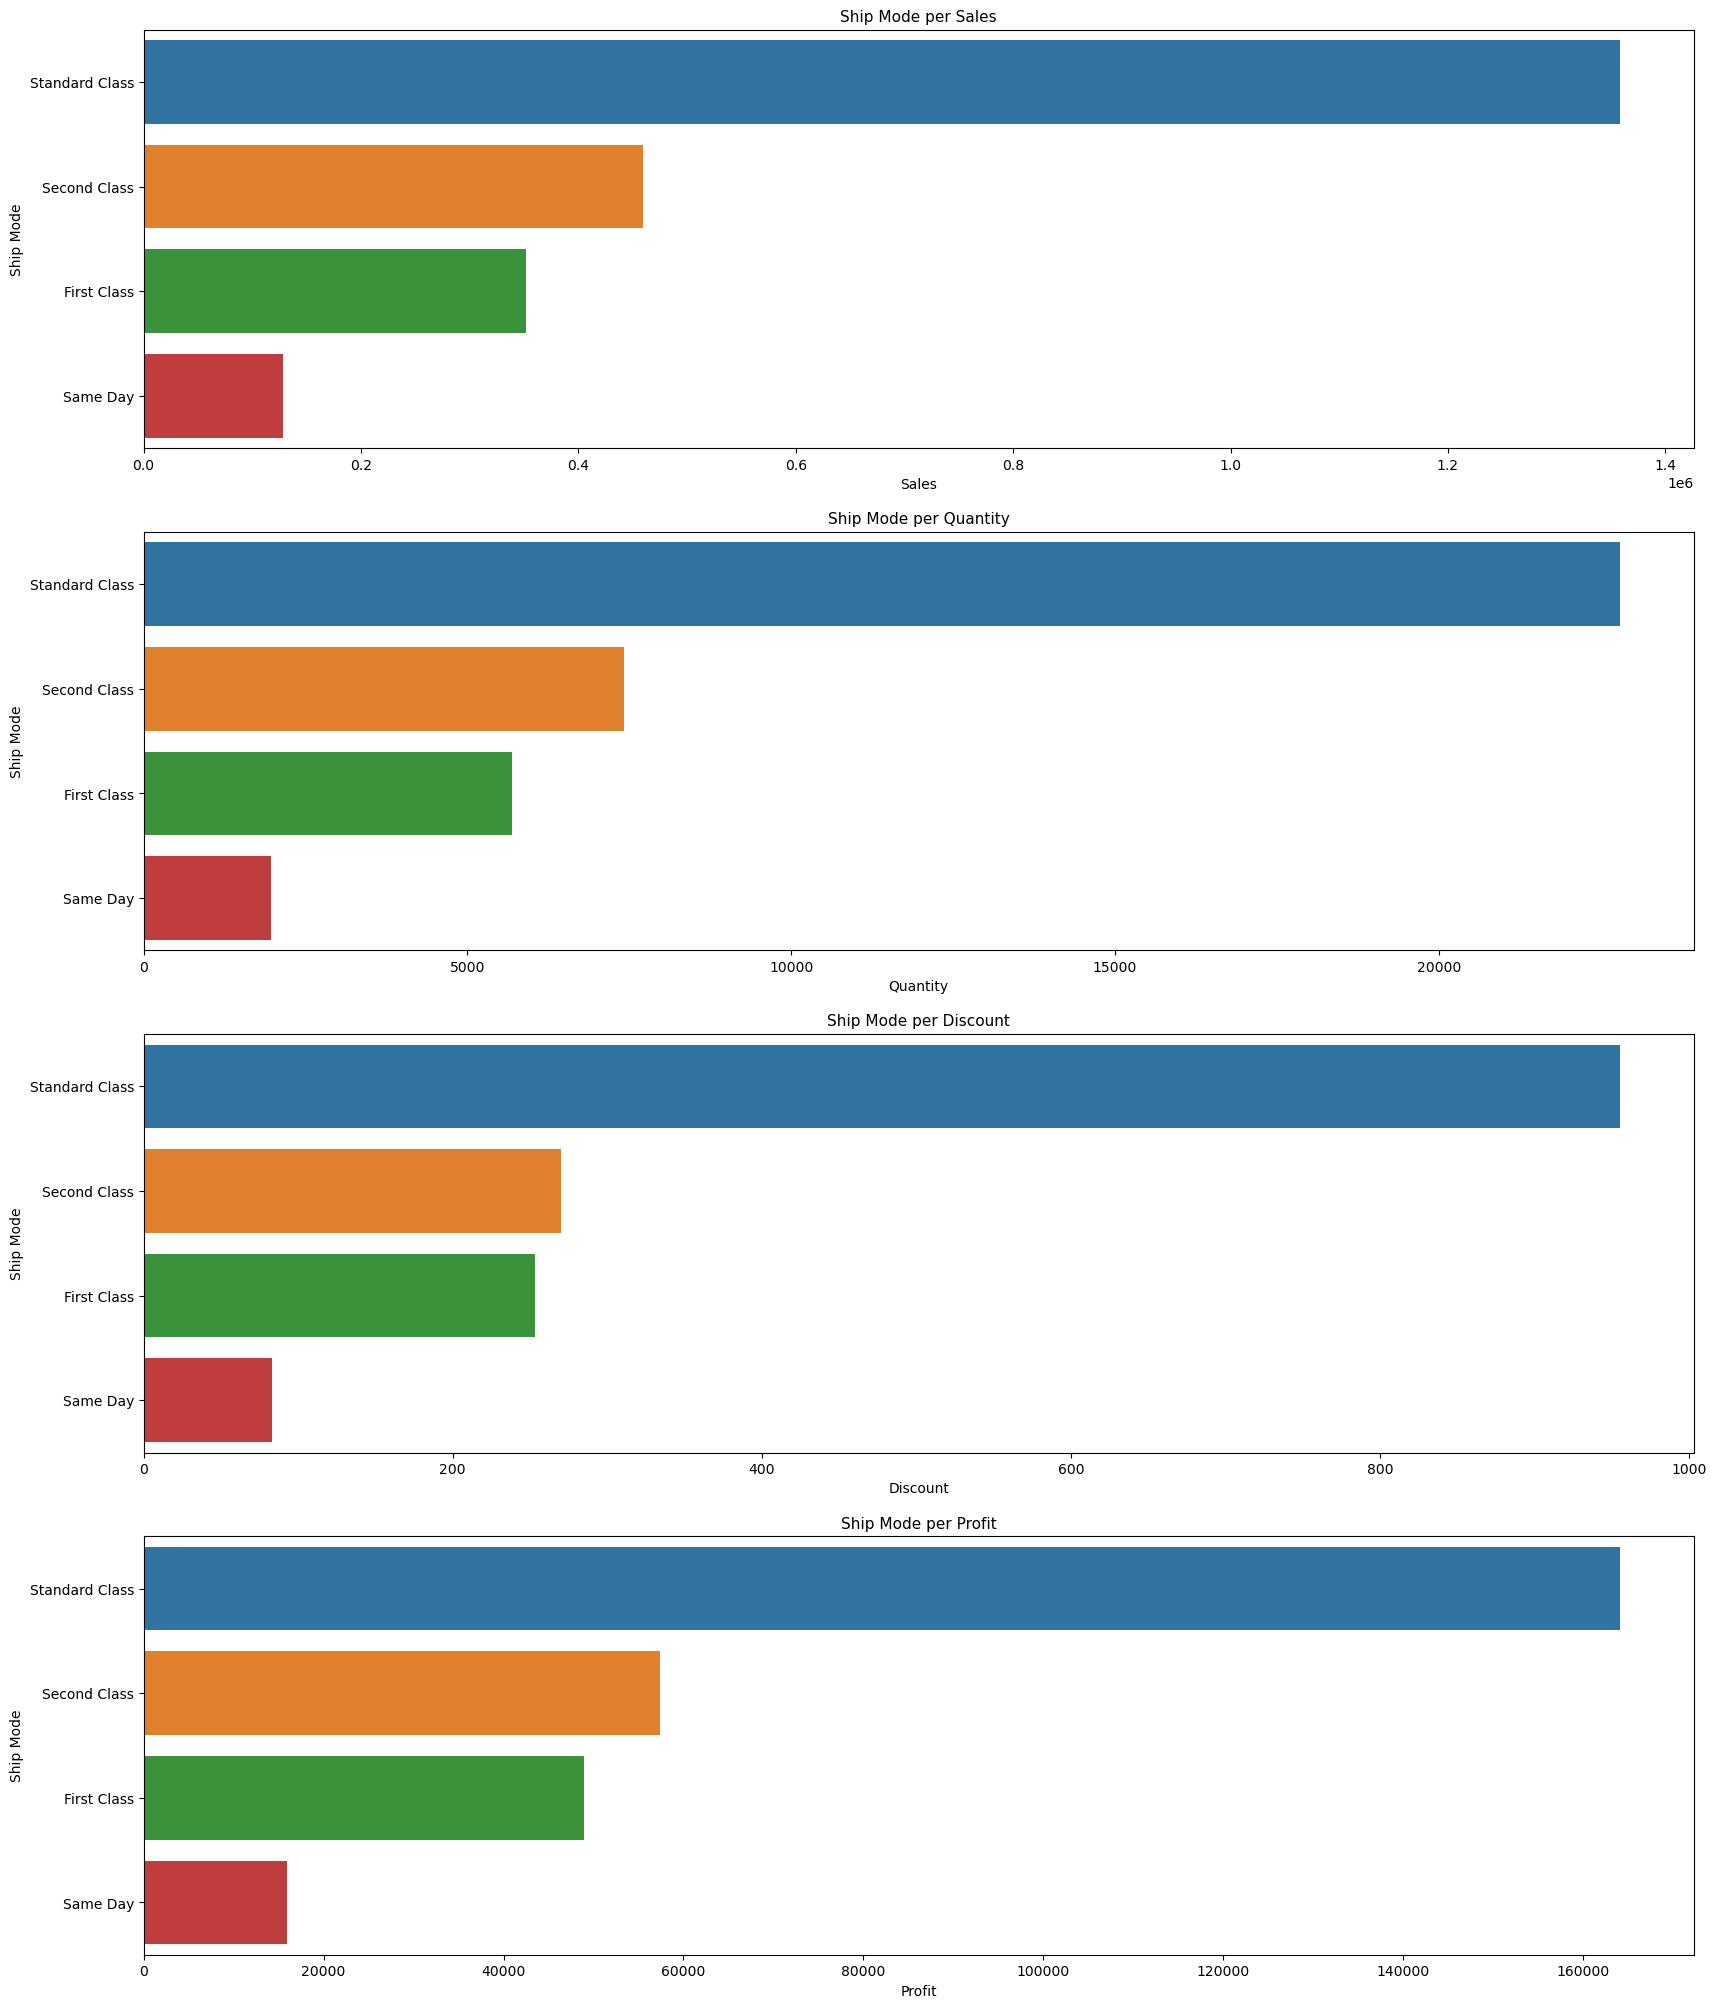

In [12]:
plt.figure(figsize=(20,25))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('Ship Mode')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Ship Mode'])
        plt.title('Ship Mode per {}'.format(i) , fontsize=11)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Ship Mode' , fontsize=10)
    plot +=1
plt.show()    

Standard Class Cargo Category is the toppest and the highest in its sales and profit despite of having the highest discount while the smae day cargo is the least at all statistics

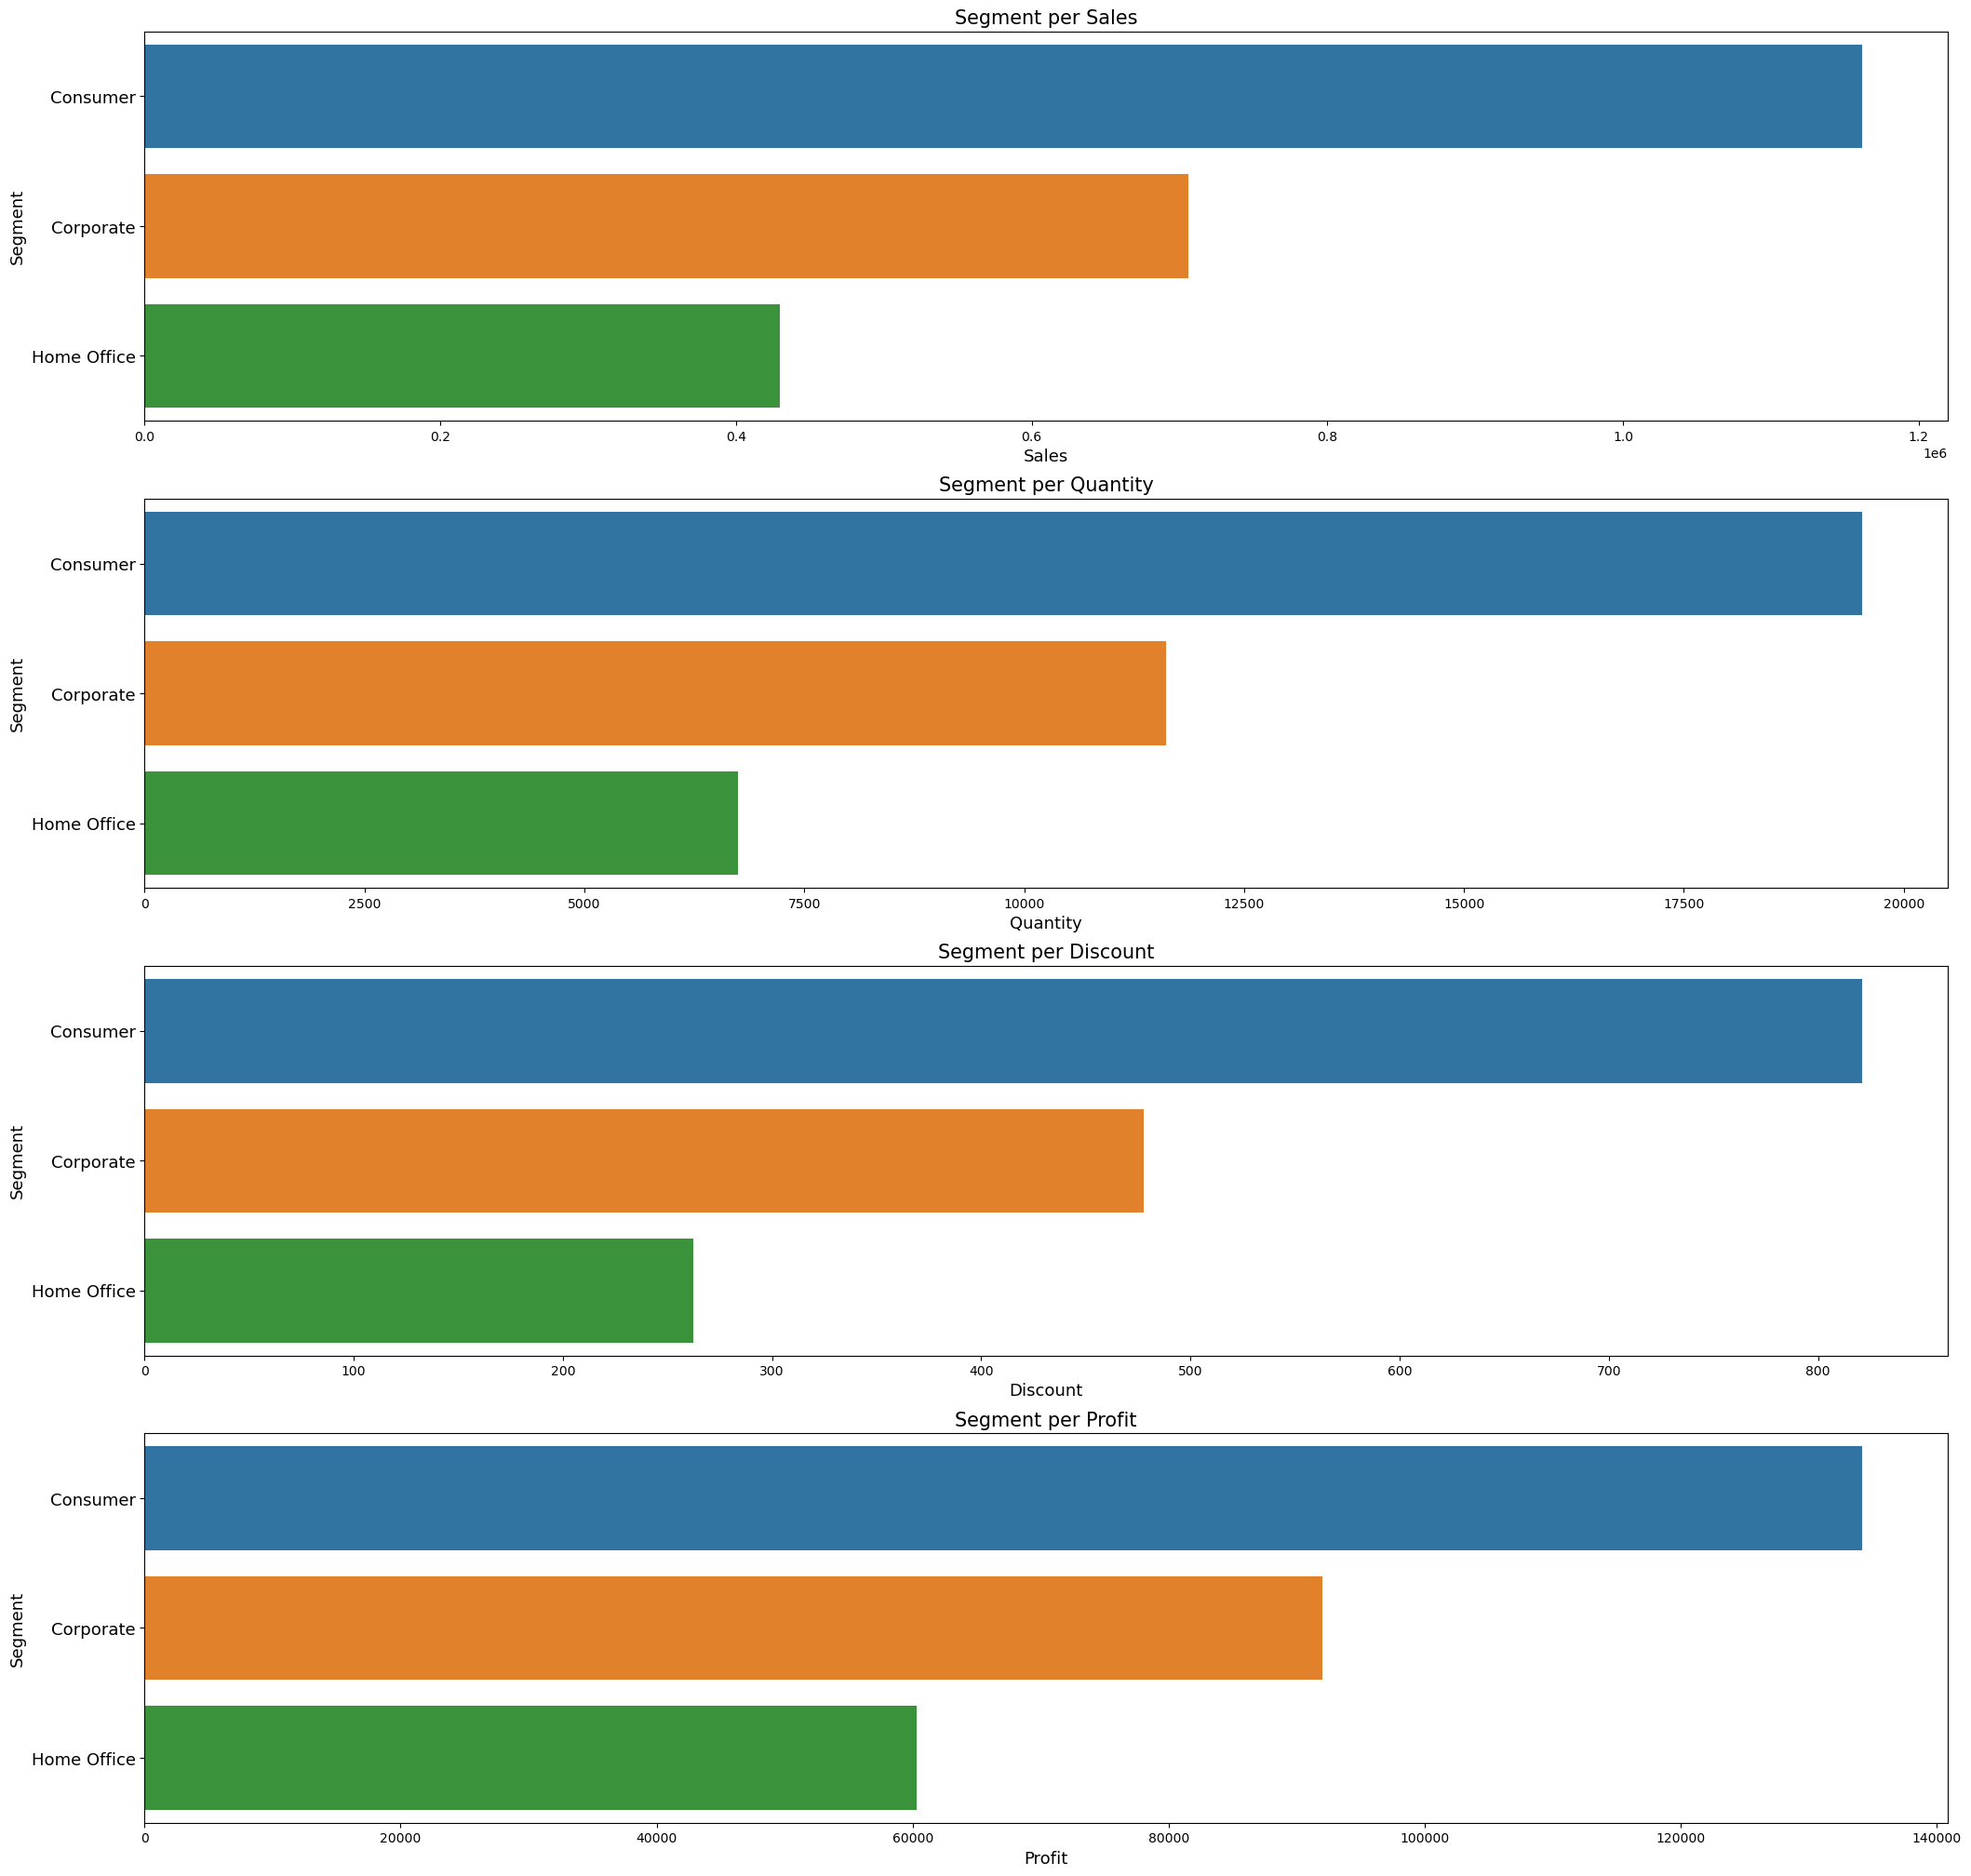

In [13]:
plt.figure(figsize=(25,25))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('Segment')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Segment'])
        plt.title('Segment per {}'.format(i) , fontsize=15)
        plt.xlabel(i,fontsize=13)
        plt.ylabel('Segment' , fontsize=13)
        plt.yticks(fontsize=13)
    plot +=1
plt.show()    

Consumer segment is the highest one in saled quantities and by the way in profit white Corporate one is the second and Home ffice is the lowest segment in sales and profits

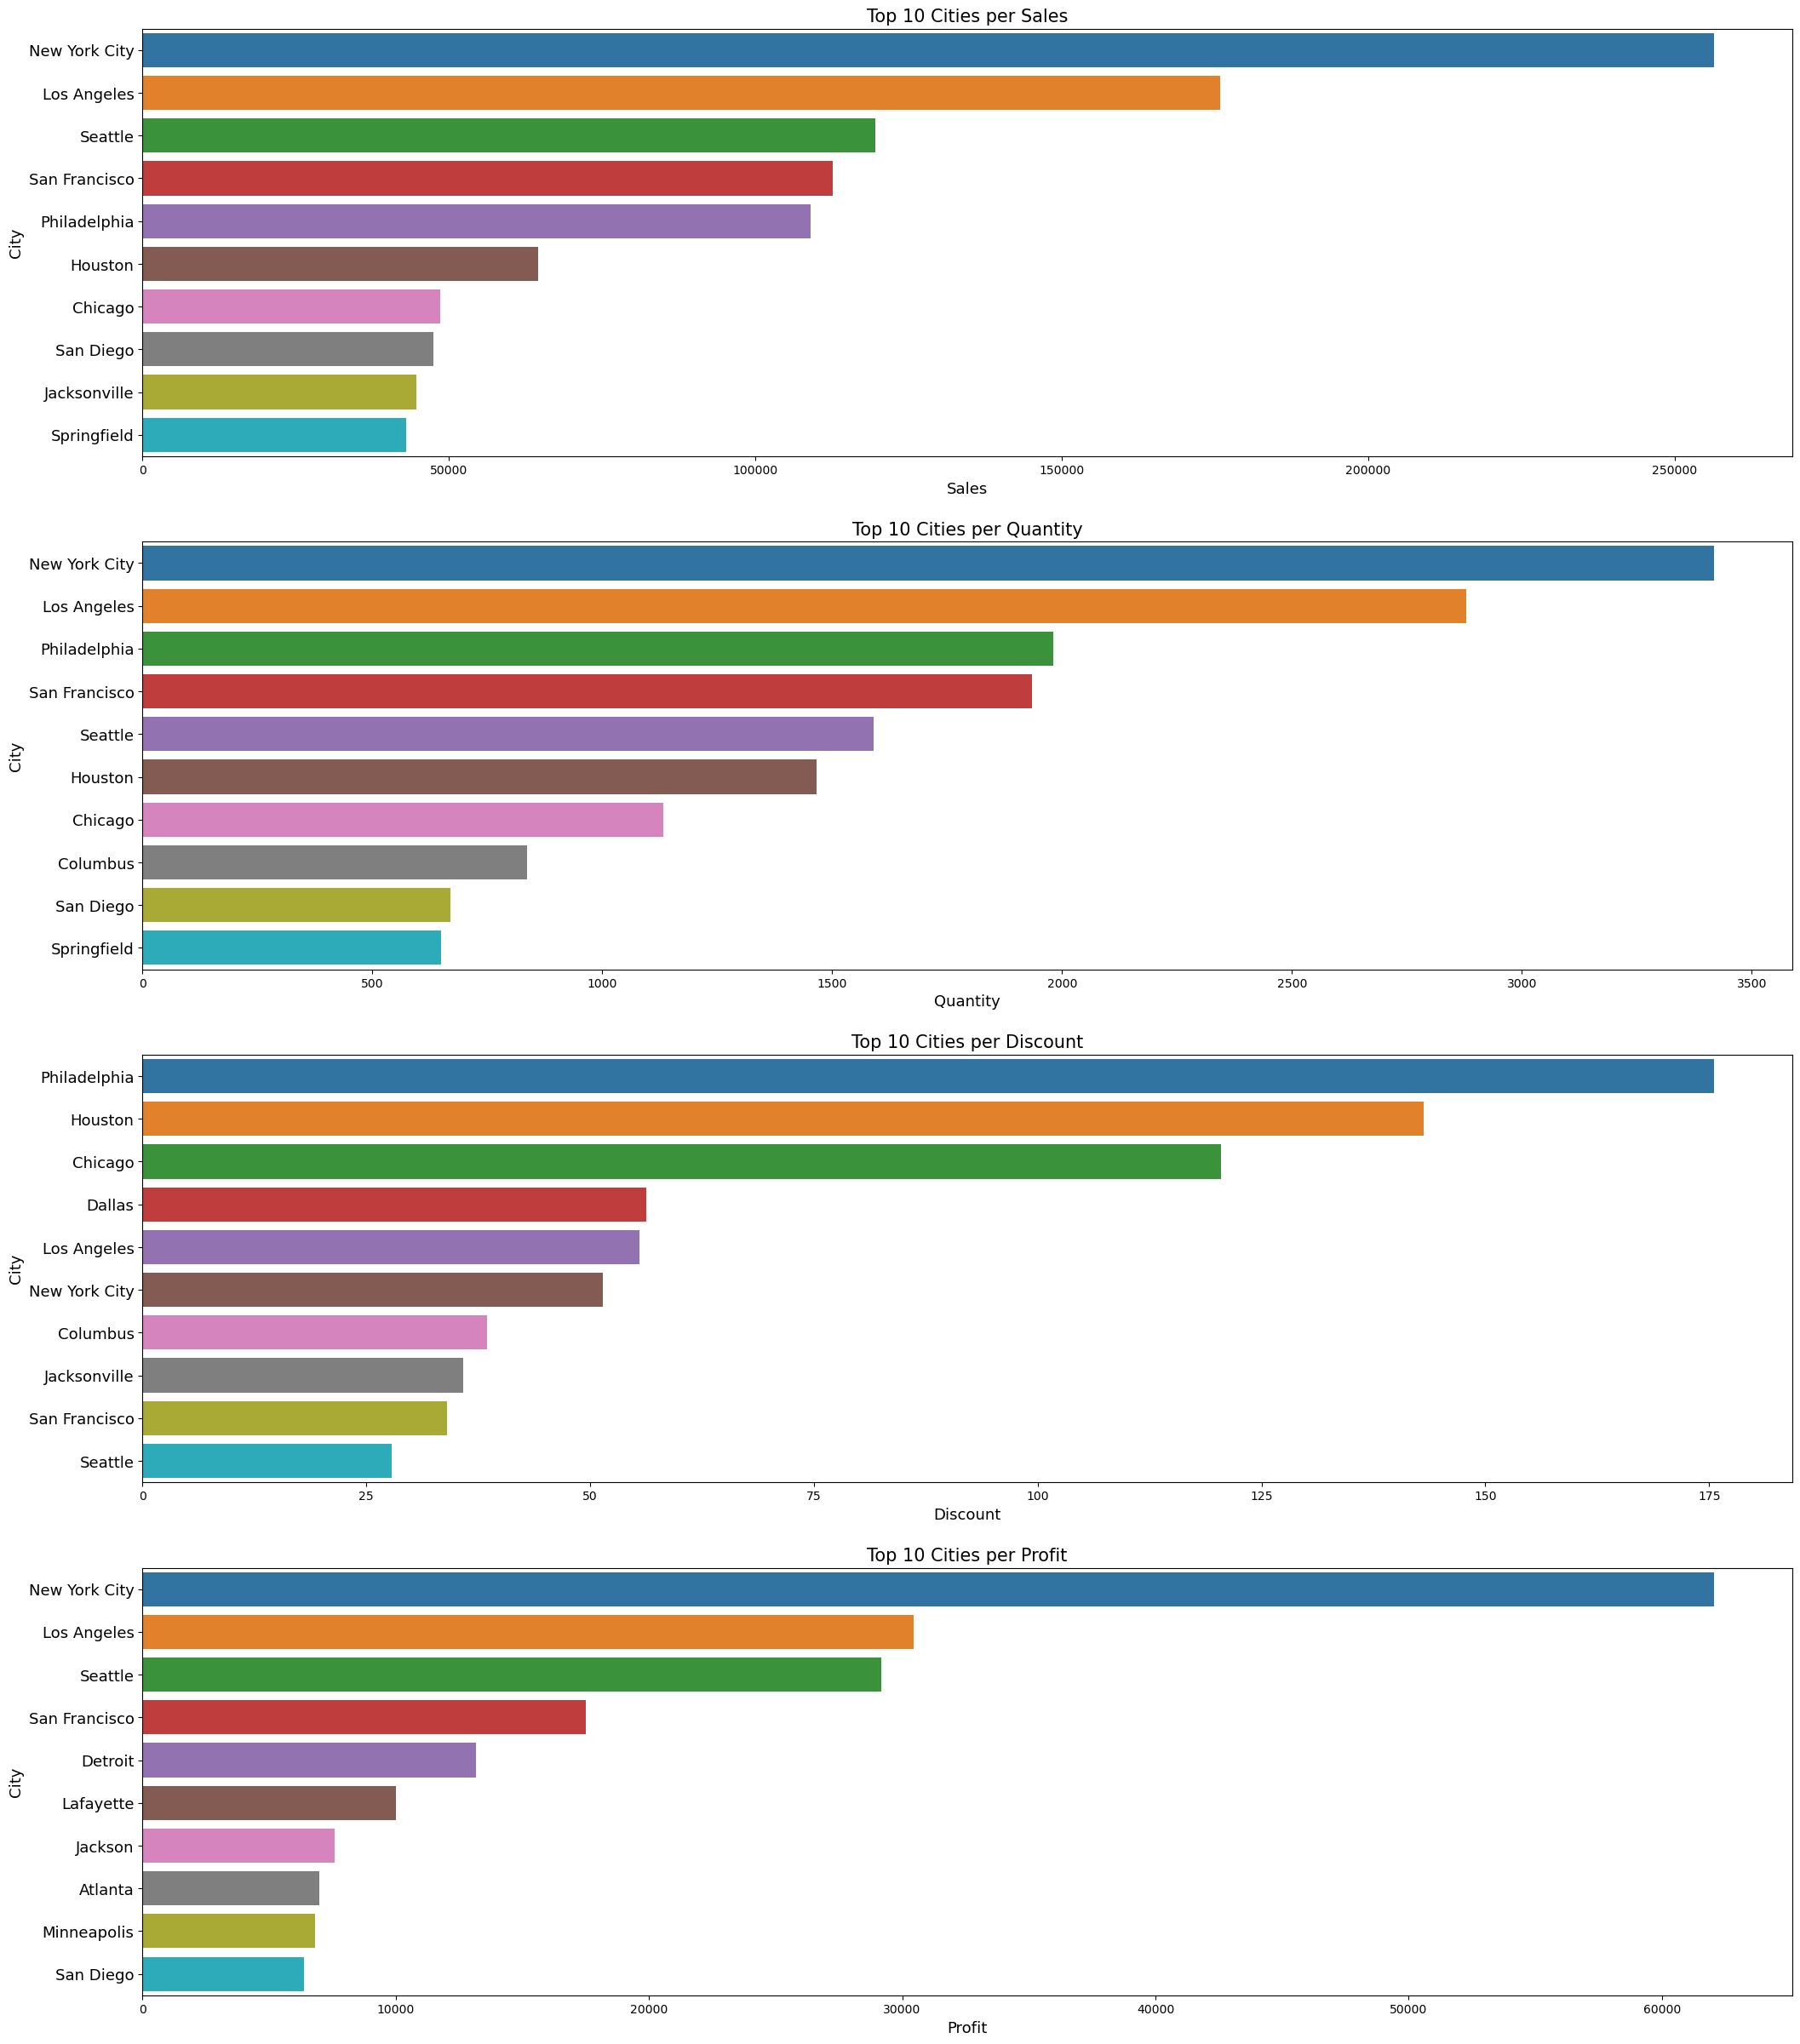

In [14]:
plt.figure(figsize=(25,30))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('City')[i].sum().sort_values(ascending=False).reset_index()[0:10]
        sns.barplot(x=dt[i] , y=dt['City'])
        plt.title('Top 10 Cities per {}'.format(i) , fontsize=15)
        plt.xlabel(i,fontsize=13)
        plt.ylabel('City' , fontsize=13)
        plt.yticks(fontsize=13)
    plot +=1
plt.show()    

- New York City is the highest city in recorded sales and profits which indicates to the refreshing economic condition and the high rates of its residents' cosnumption despite that it is not that high in offered discounts

- Los Angeles is having the second recorded position in sales and profit regradless of its low discount on cargos

- Philadelphia is having the highest discount on Cargos among all cities but it is no performing economically well in selling and making profits which says economic issues

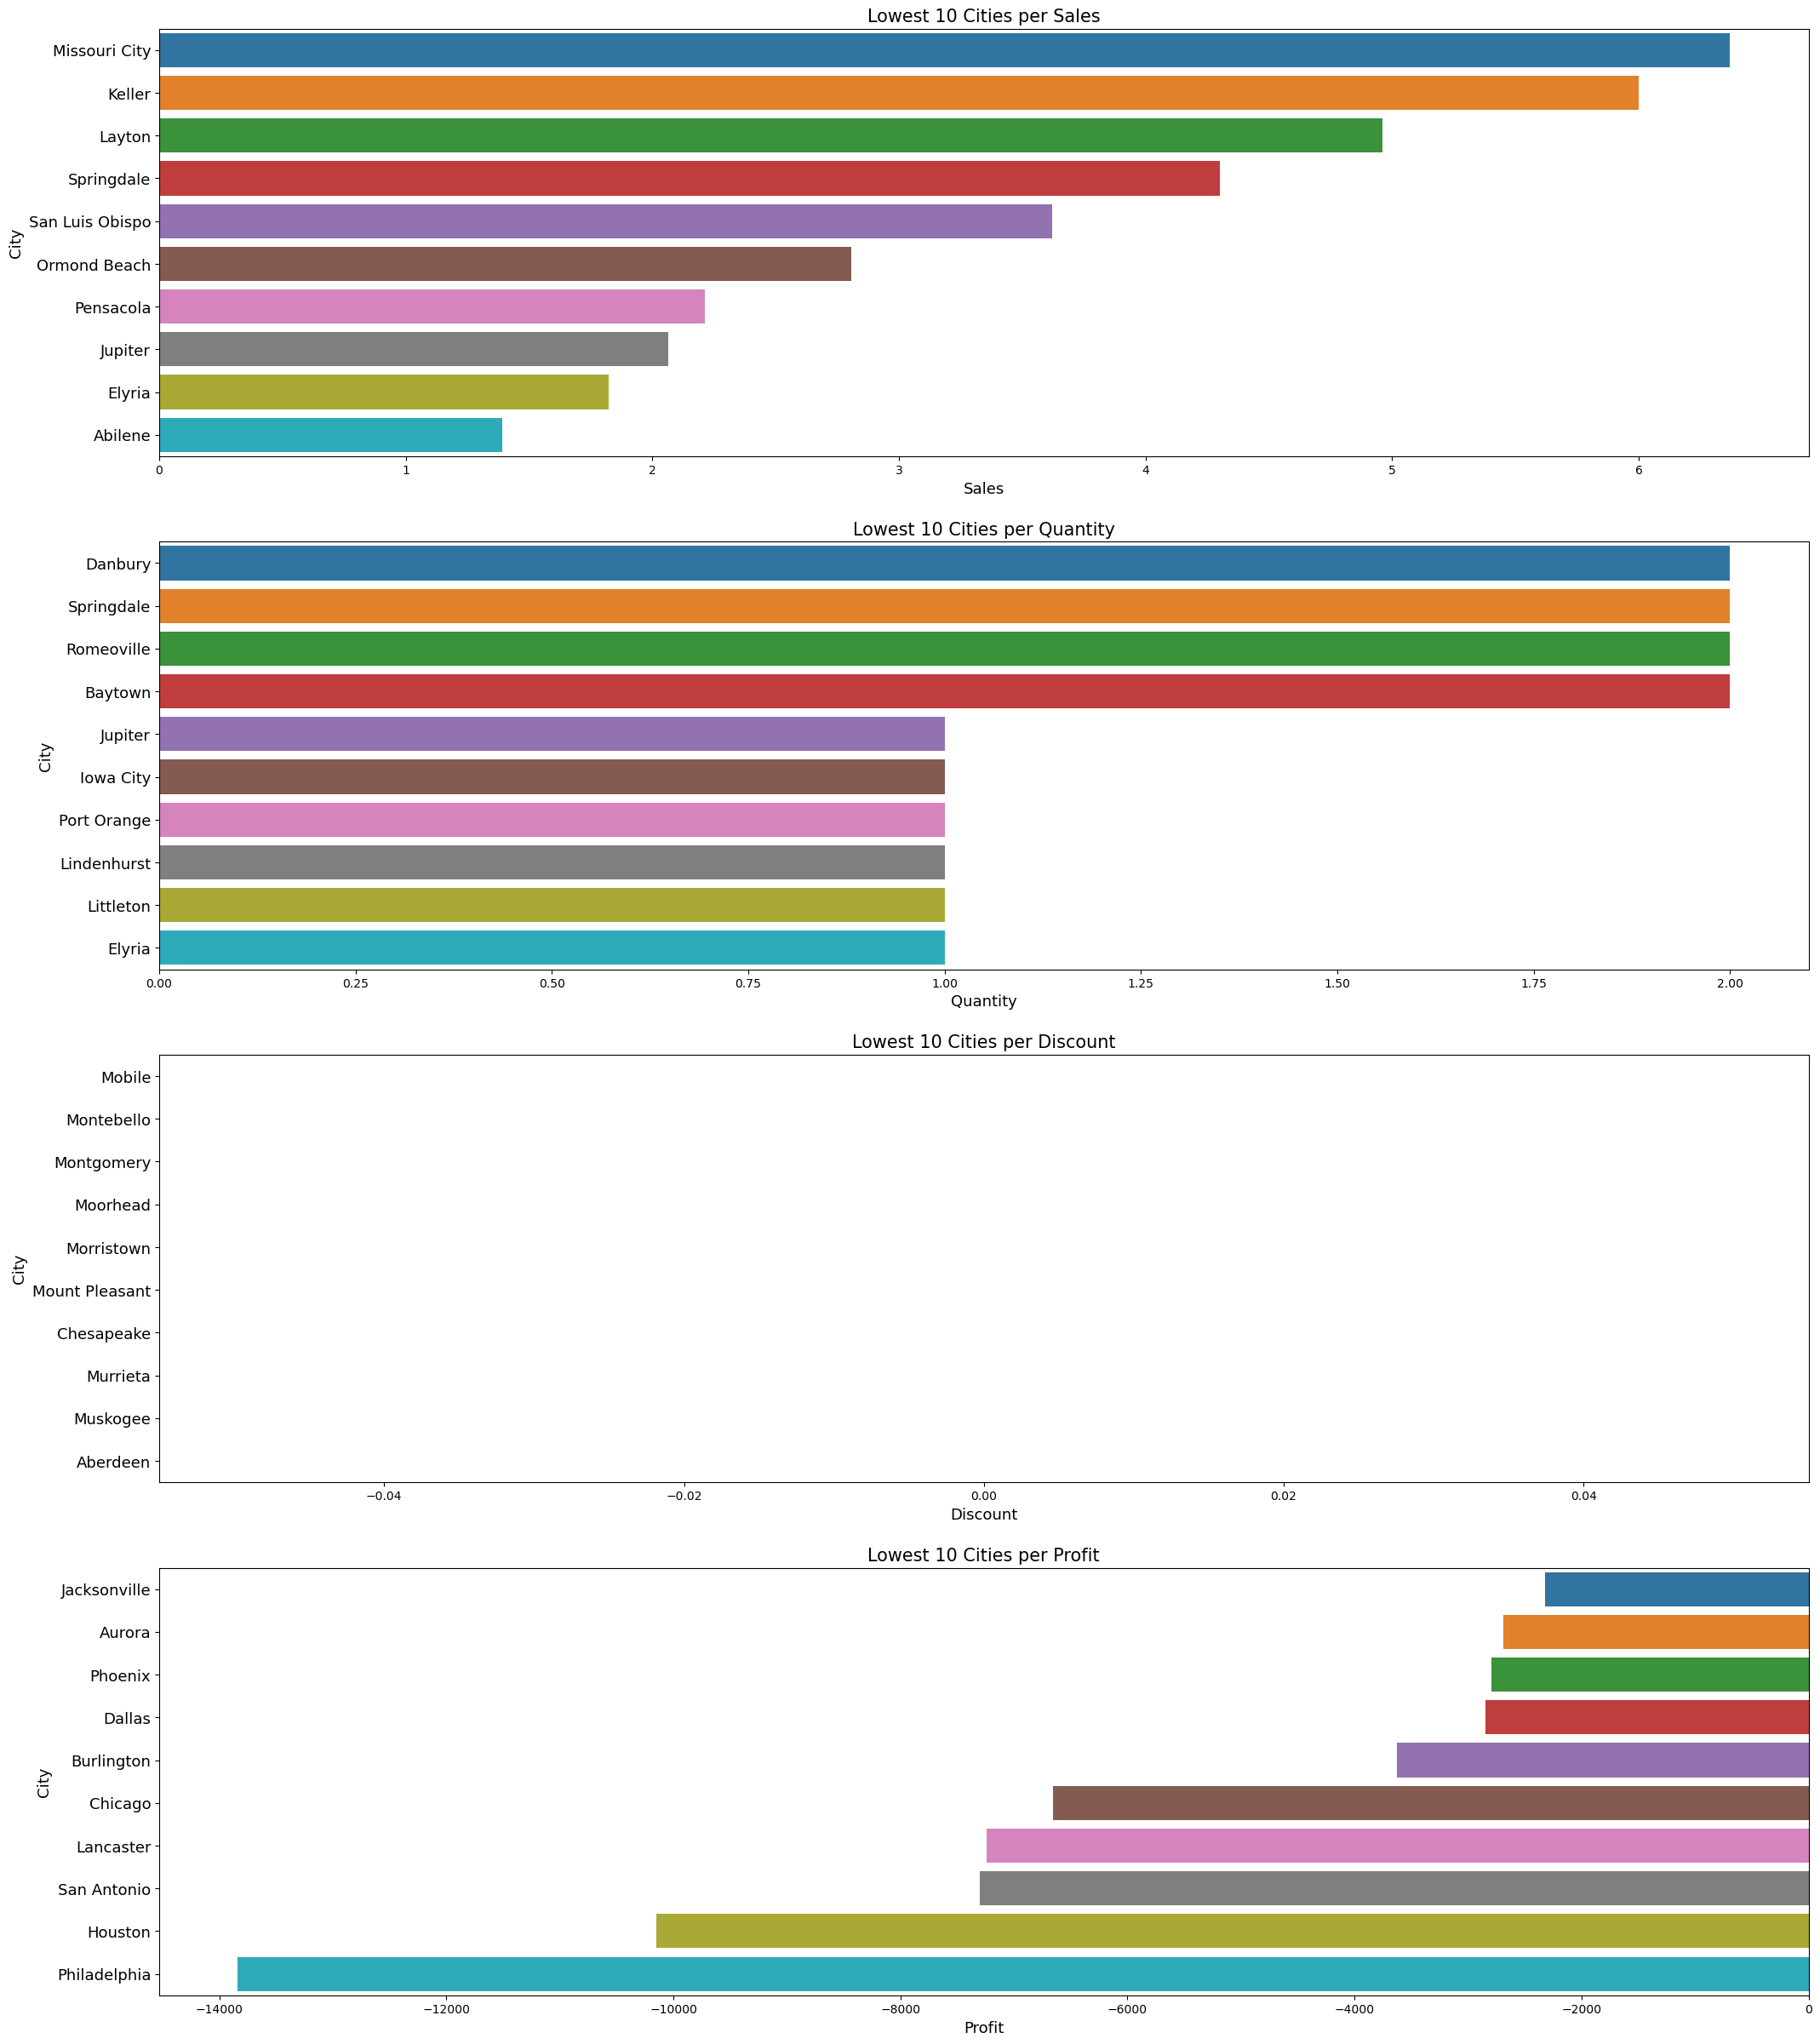

In [15]:
plt.figure(figsize=(25,30))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('City')[i].sum().sort_values(ascending=False).reset_index()[-10:]
        sns.barplot(x=dt[i] , y=dt['City'])
        plt.title('Lowest 10 Cities per {}'.format(i) , fontsize=15)
        plt.xlabel(i,fontsize=13)
        plt.ylabel('City' , fontsize=13)
        plt.yticks(fontsize=13)
    plot +=1
plt.show()    

- Philadelphia is suffering from low consumption and the lowest profit among all cities despite of the high discounts on Cargos

- Abilene is the lowest state in sales with modest discounts on Cargos 

- Elyria City is facing a shrinkage in its logistic economy as it is the lowest city in cargo trade and quantities of goods

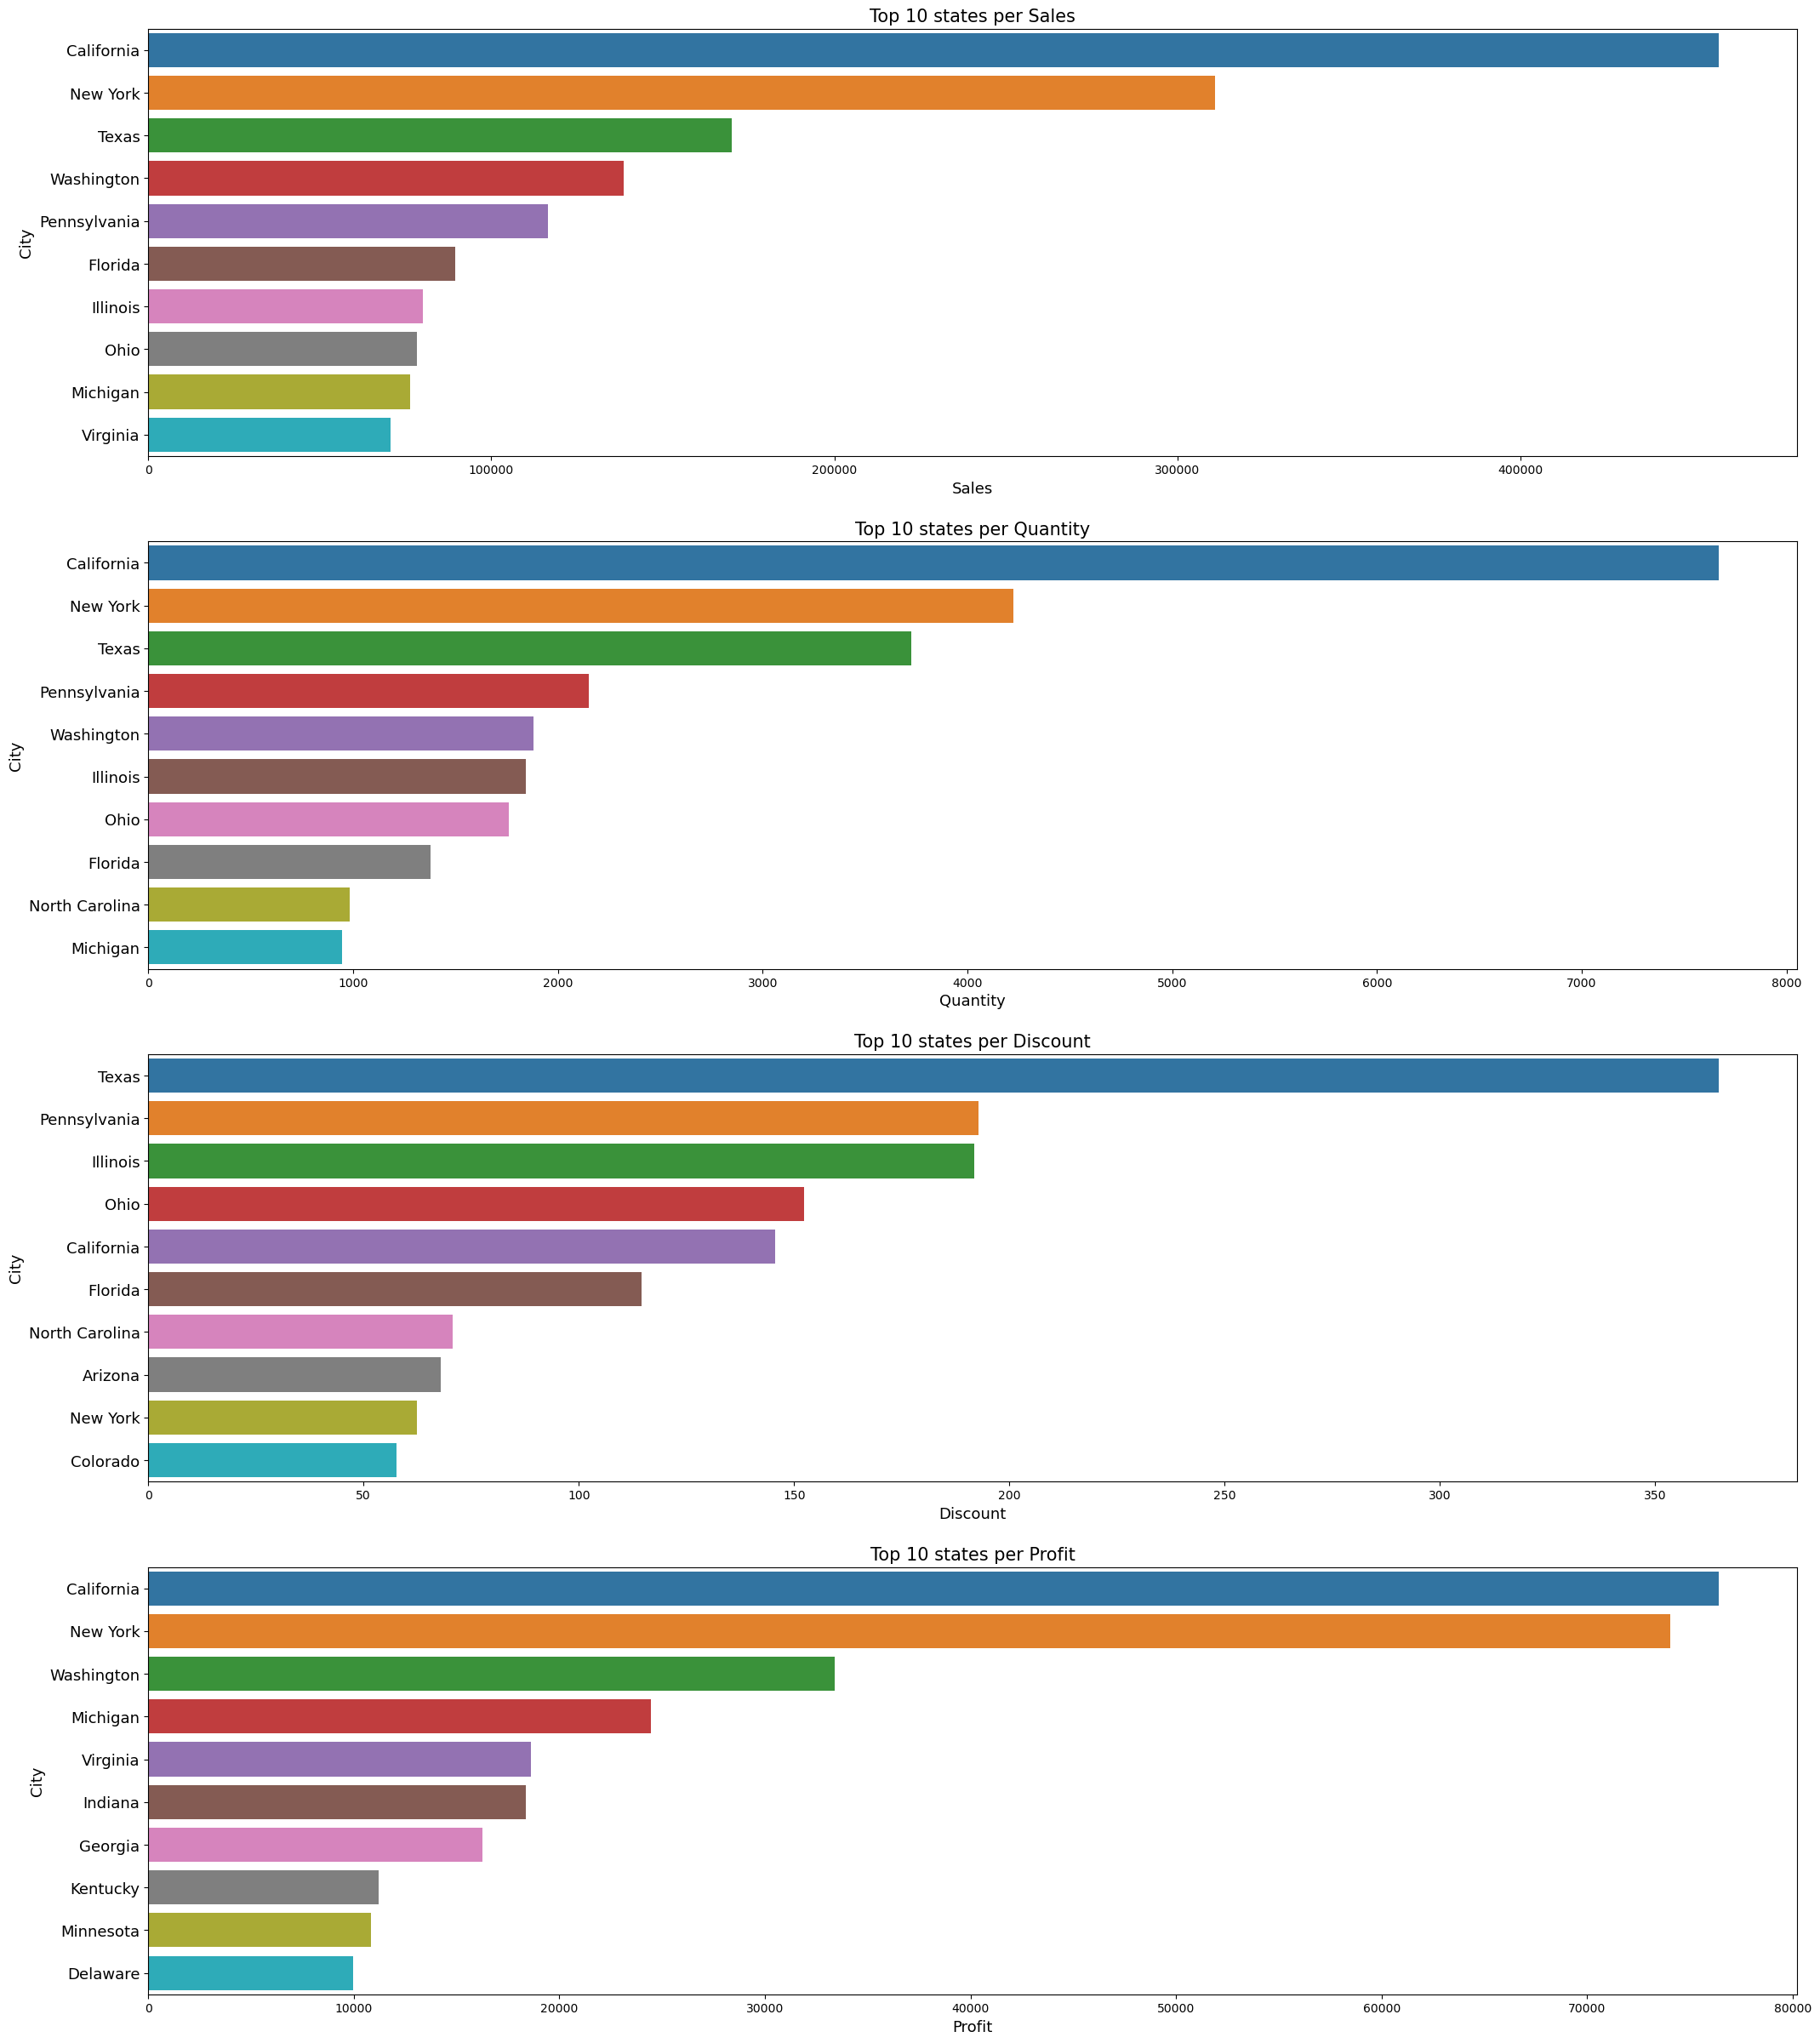

In [16]:
plt.figure(figsize=(25,30))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('State')[i].sum().sort_values(ascending=False).reset_index()[0:10]
        sns.barplot(x=dt[i] , y=dt['State'])
        plt.title('Top 10 states per {}'.format(i) , fontsize=15)
        plt.xlabel(i,fontsize=13)
        plt.ylabel('City' , fontsize=13)
        plt.yticks(fontsize=13)
    plot +=1
plt.show()    

- California is doing very well in sales and profits due to it diverse economical infrastructure while new york is in the second place

- Texas is having the highest discount on Cargos among all states but come in the third place in sales according the low taxes but no profits in the top 10

- Penssylvania is scoring moderate numbers of sales with no aspiring profits 

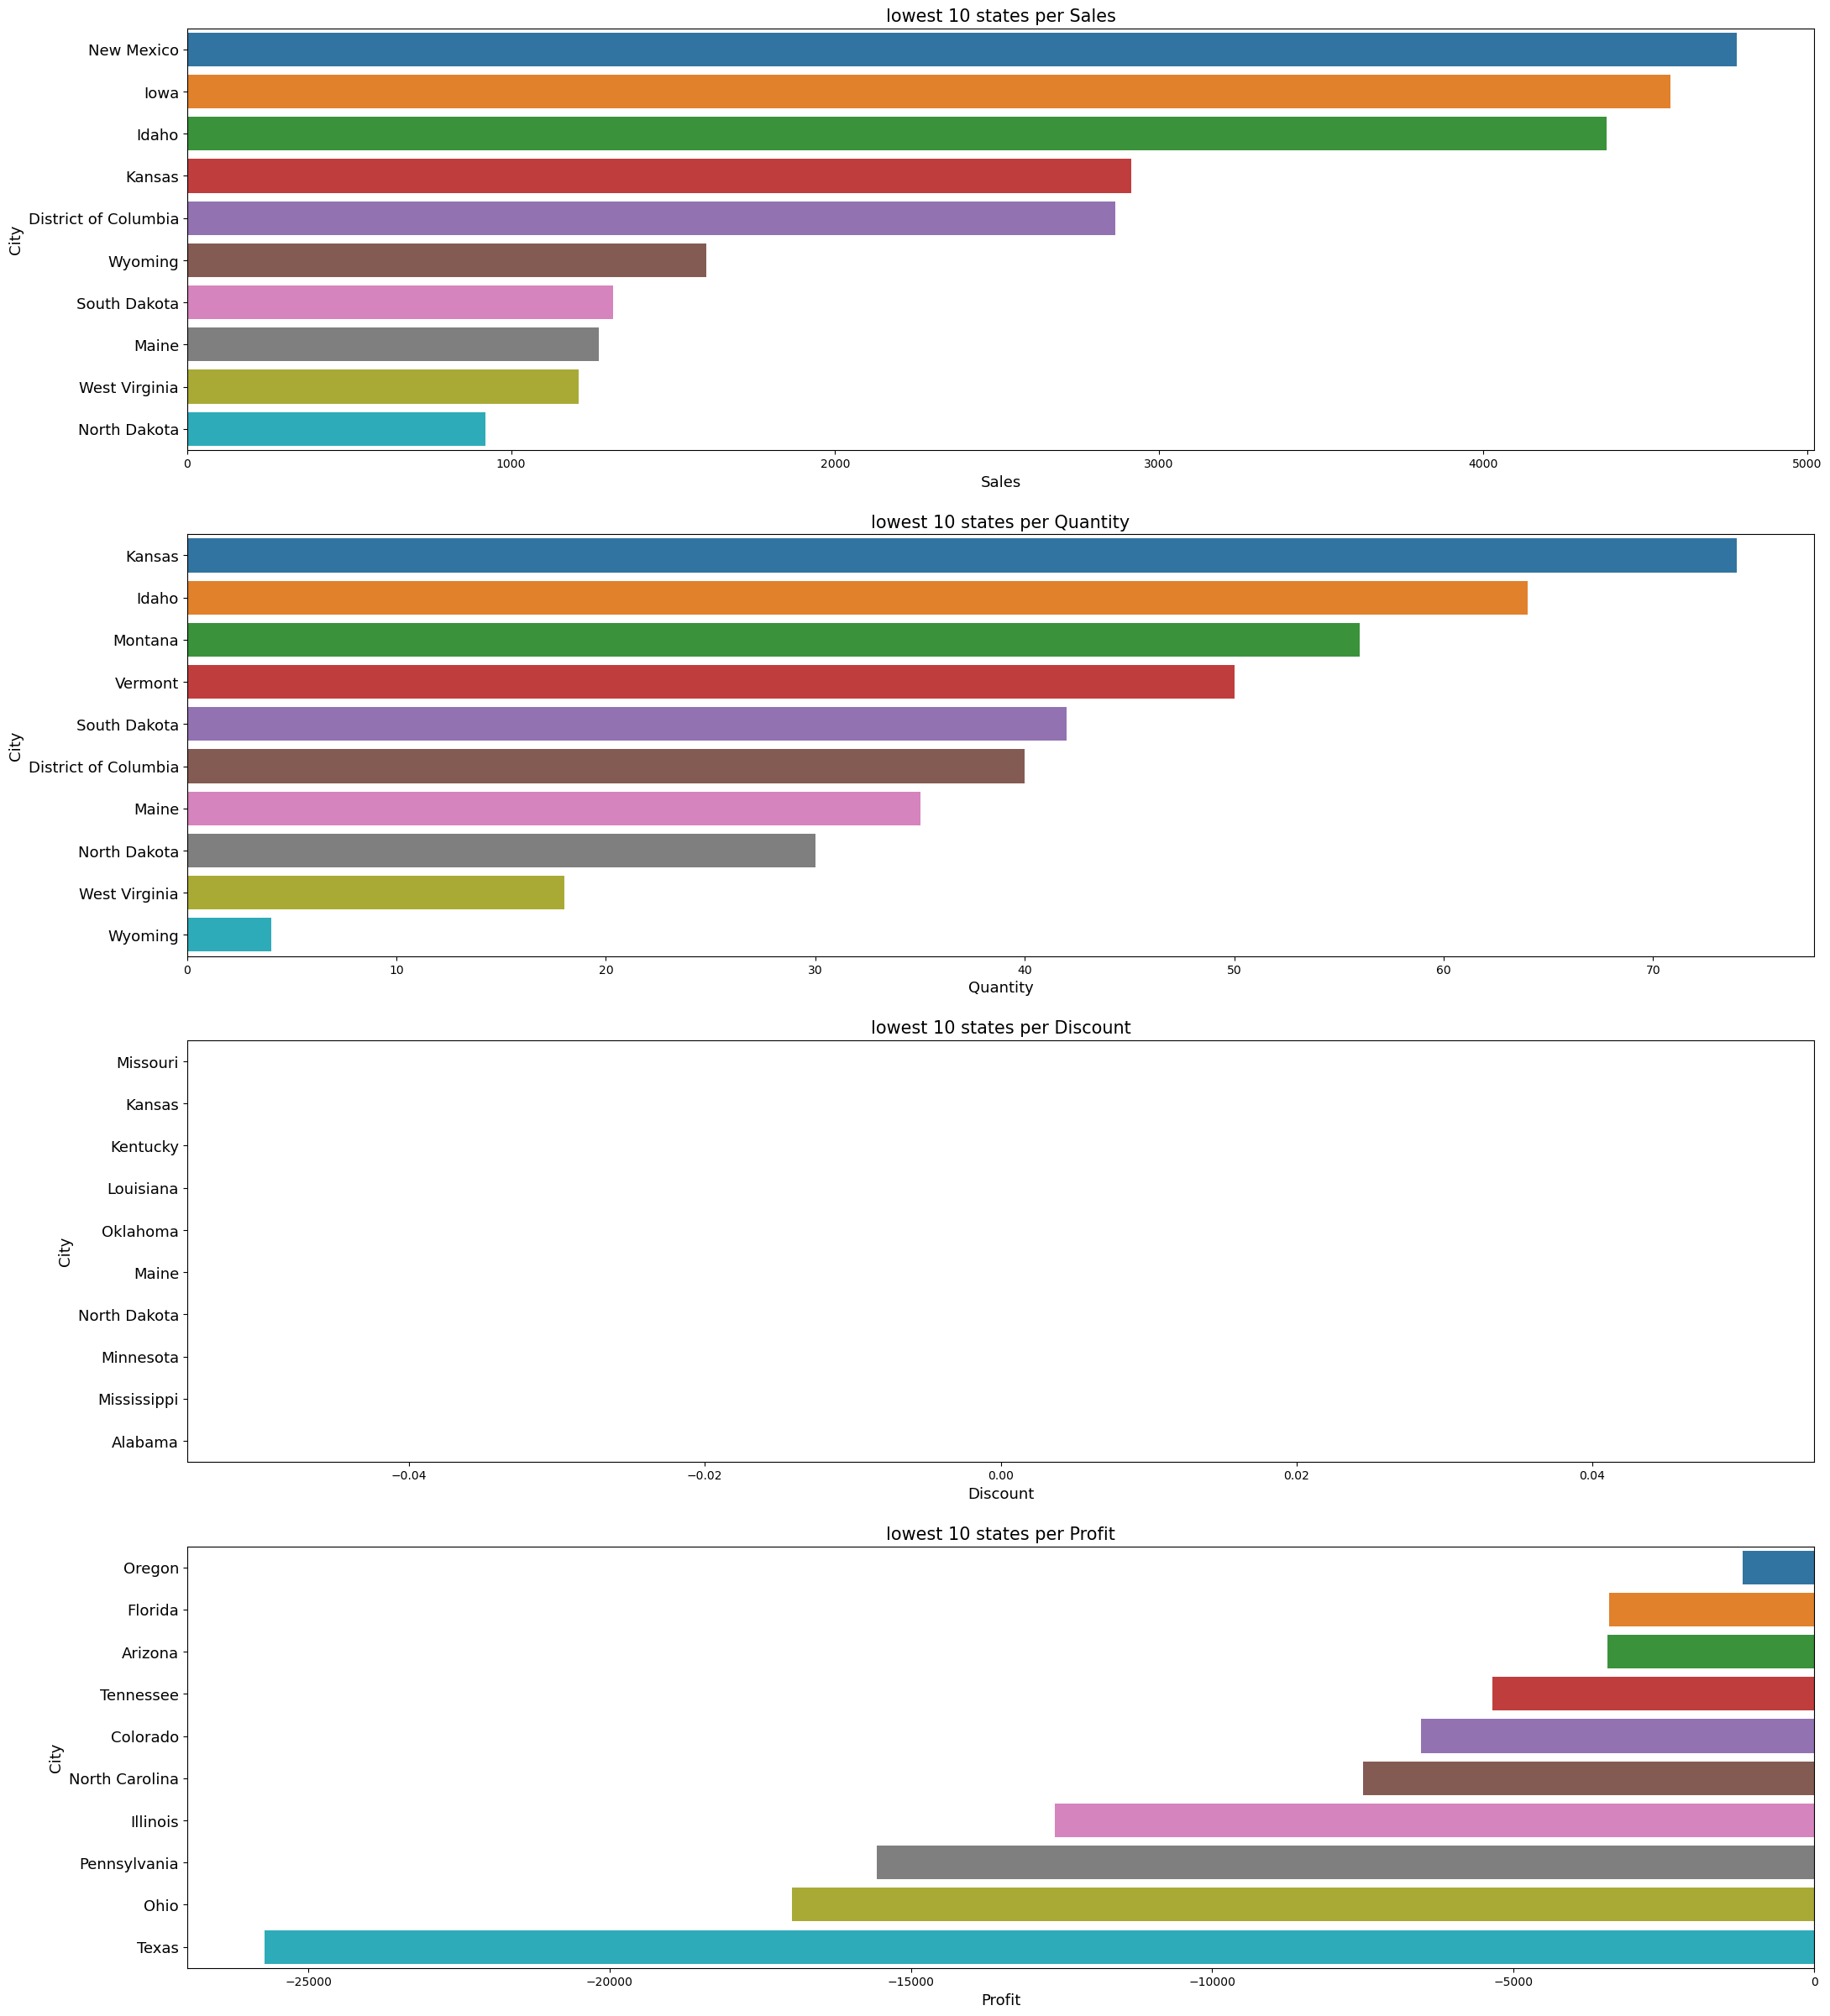

In [17]:
plt.figure(figsize=(25,30))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('State')[i].sum().sort_values(ascending=False).reset_index()[-10:]
        sns.barplot(x=dt[i] , y=dt['State'])
        plt.title('lowest 10 states per {}'.format(i) , fontsize=15)
        plt.xlabel(i,fontsize=13)
        plt.ylabel('City' , fontsize=13)
        plt.yticks(fontsize=13)
    plot +=1
plt.show()    

- North Dakota is the lowest state in sales among all states and west virginia is the secnd

- Despite of the relative high sales in Texas but its profits of cargos is the lowest among all state because of its lackness of any sea port so it is a high consumer and Ohio is the second worst profitable state

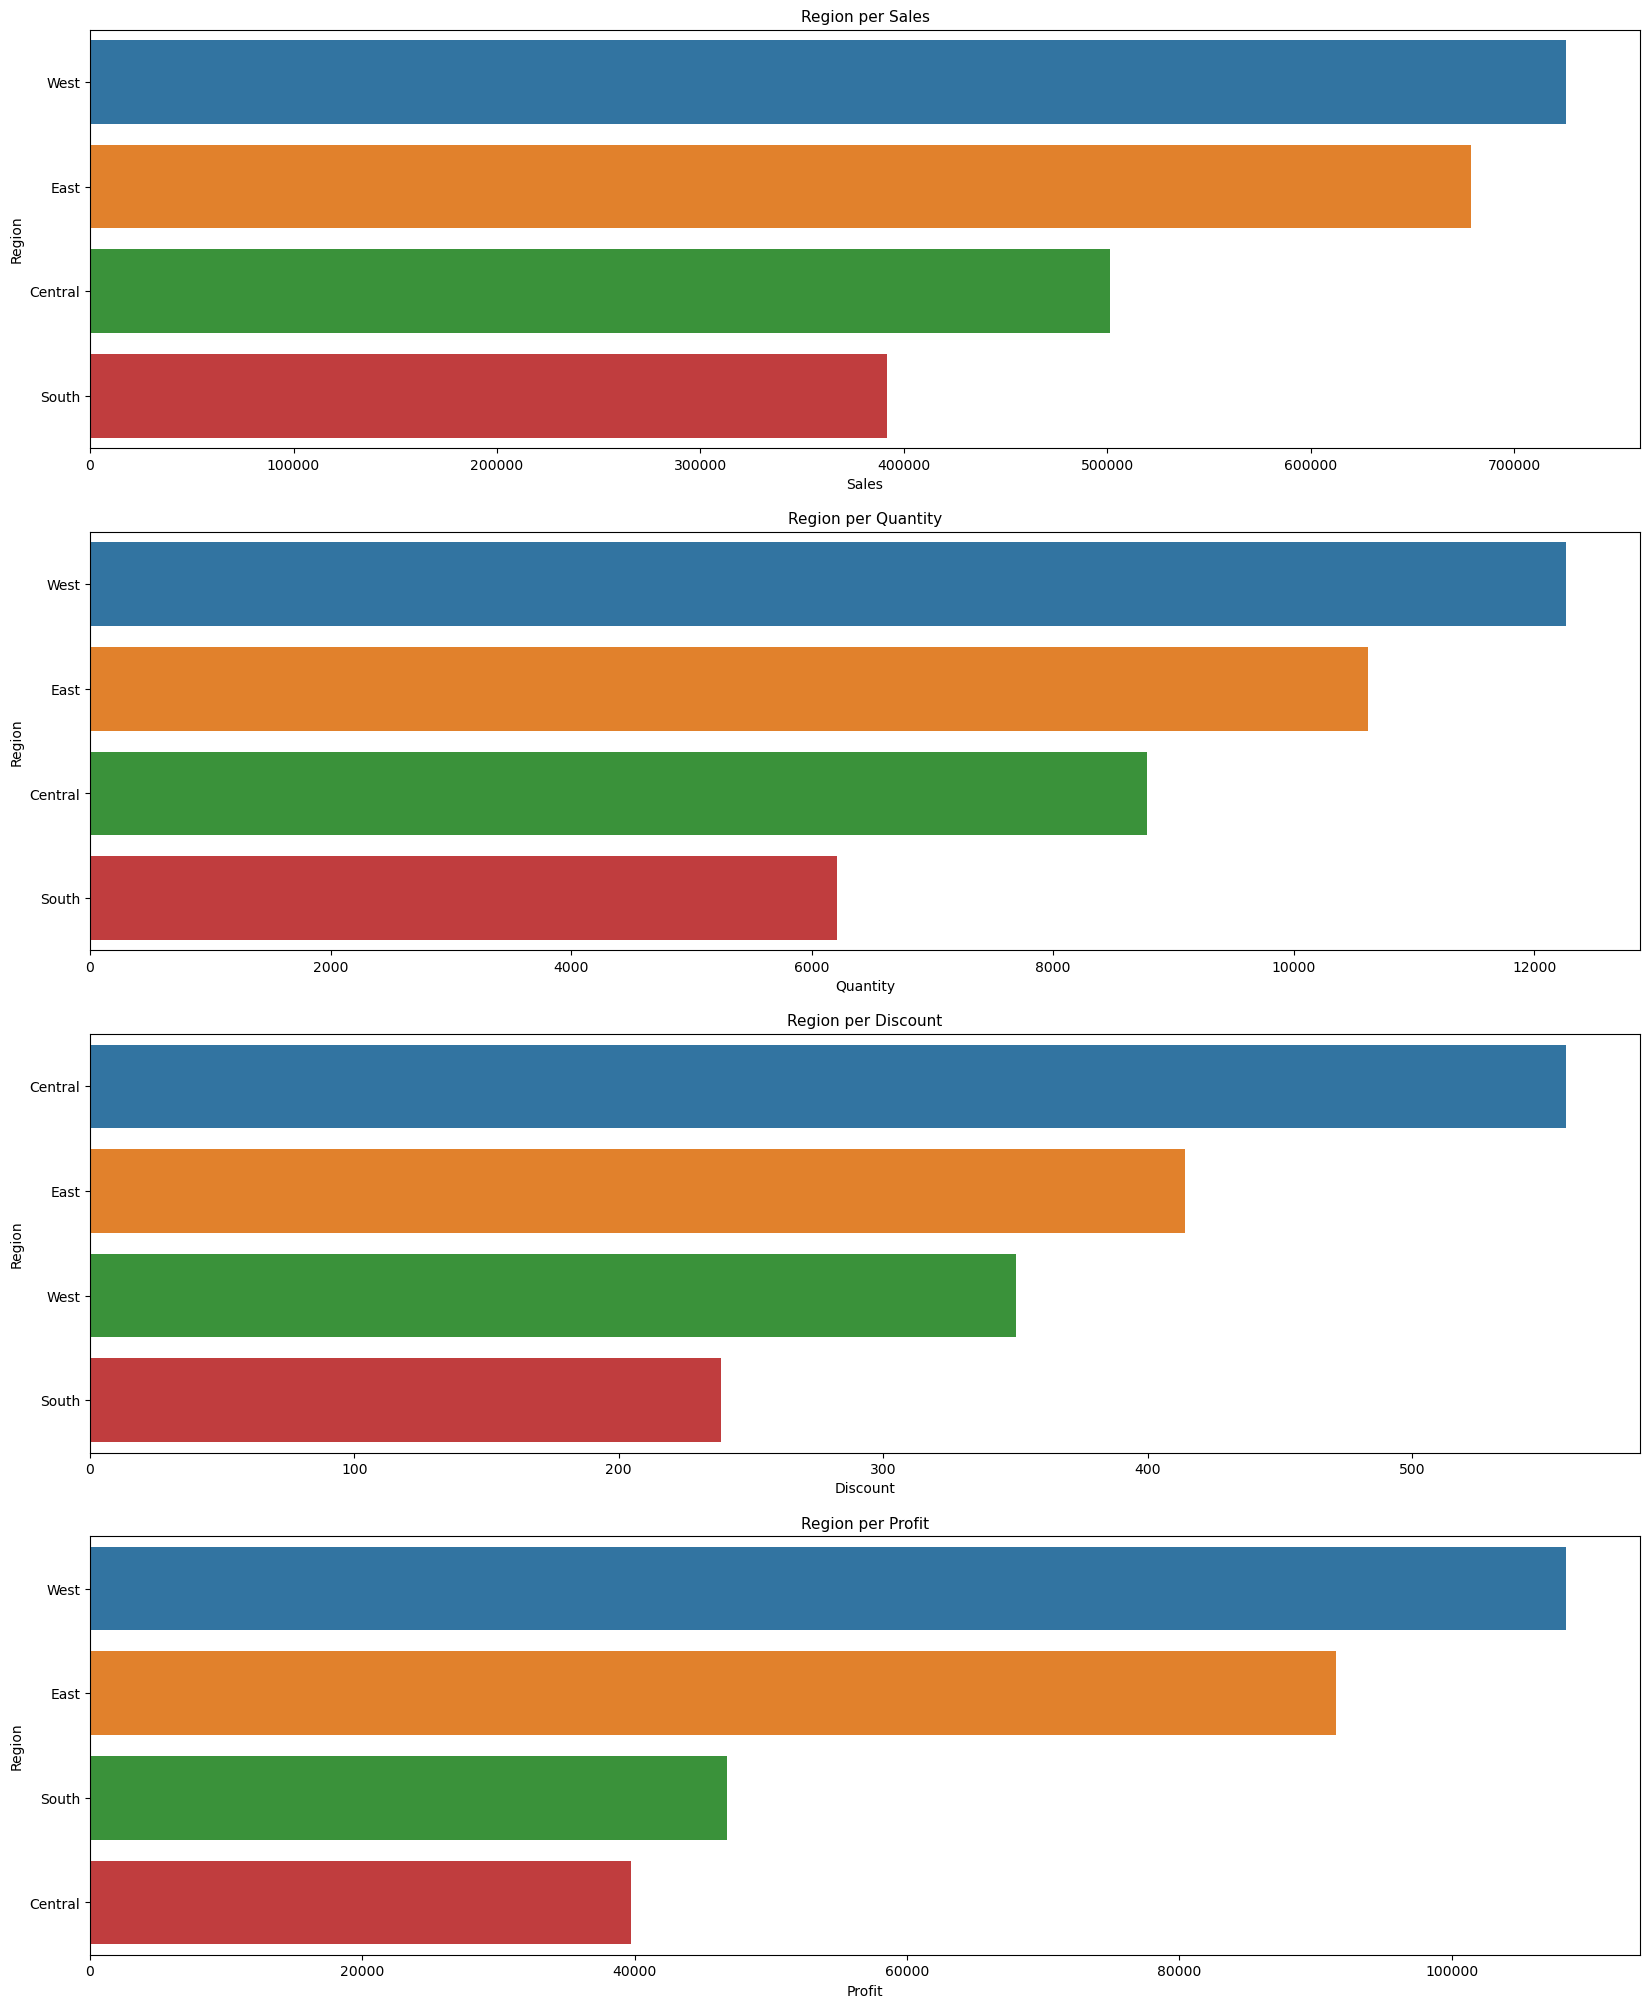

In [18]:
plt.figure(figsize=(20,25))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('Region')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Region'])
        plt.title('Region per {}'.format(i) , fontsize=11)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Region' , fontsize=10)
    plot +=1
plt.show()    

- The west Area in USA is achieving the highest record in sales and profits and the east is the second highly one because both of them are on sea ports and having the recquired logistics

- Central area has the highest discounts compared to its moderate records in sales and the lowest profit but it is still consuming highly and the transportations is an effective term in increasing the consumption in the future if they seek to gain more profit

- The south is the worst in sales and the lowest in discounts but not that to low in profits due to the different tax rate in its states

- South and /central are very low in their profit of cargos because of their lackness of sea ports so the cost of transportation are high and that is an important reason for the low sales compared to the east and the west 

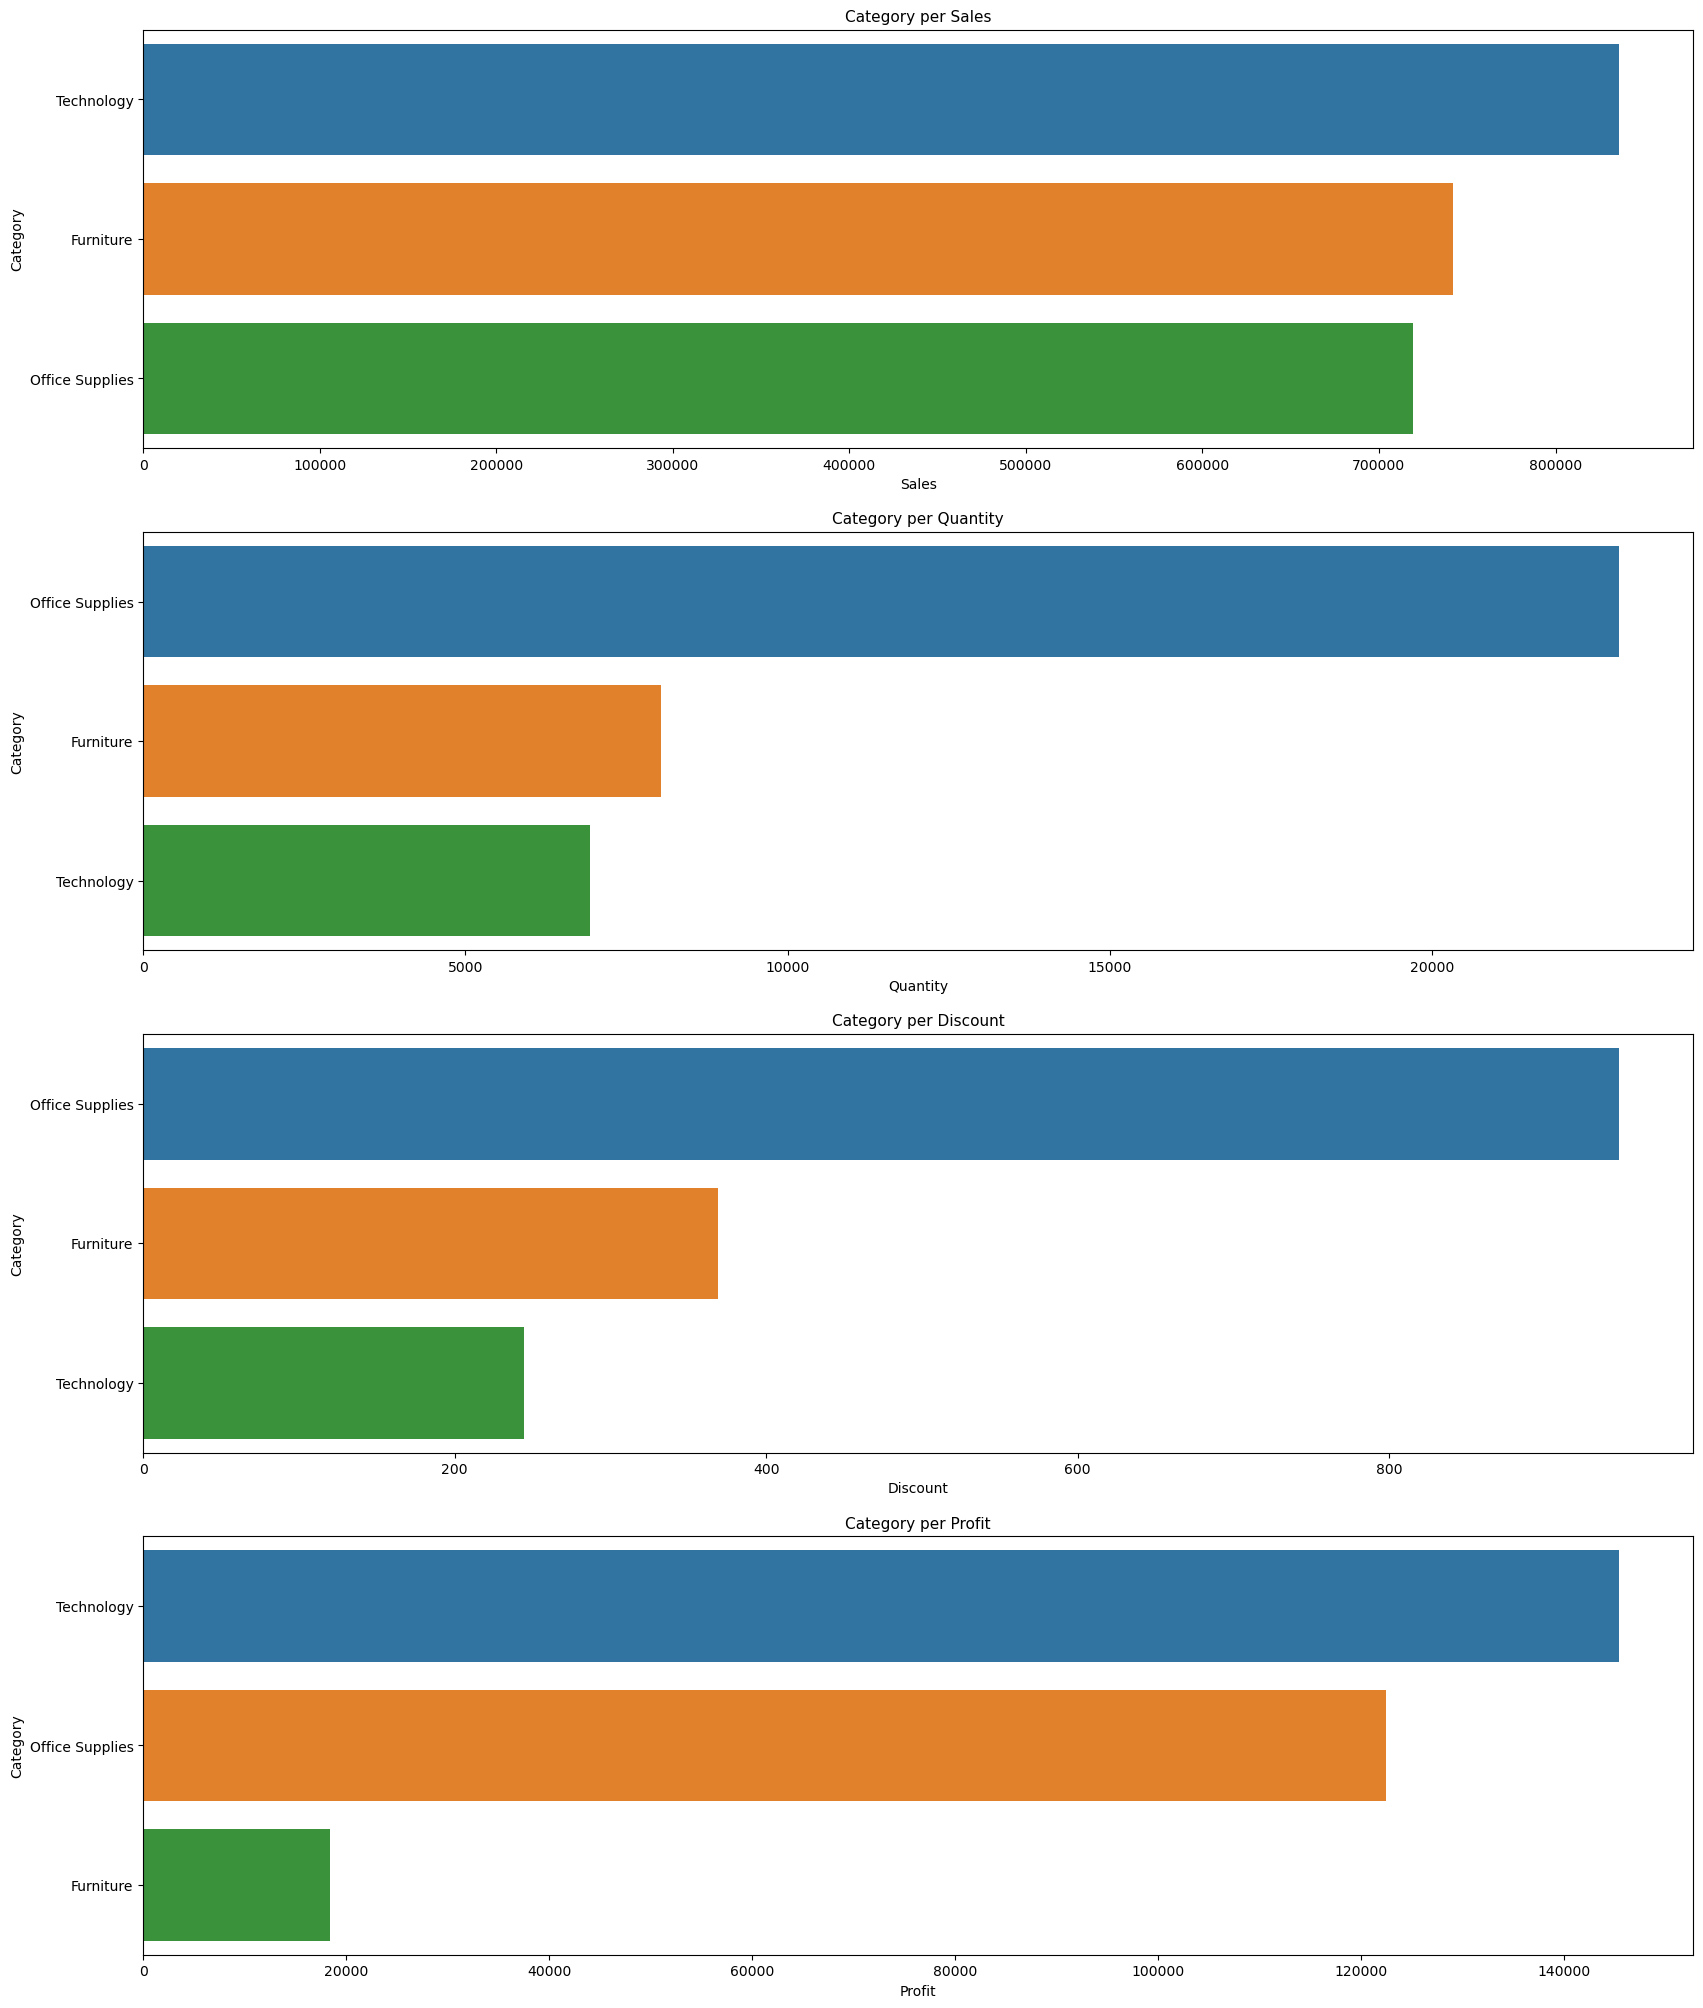

In [19]:
plt.figure(figsize=(20,25))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('Category')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Category'])
        plt.title('Category per {}'.format(i) , fontsize=11)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Category' , fontsize=10)
    plot +=1
plt.show()    

- Technology sales are the highest sales and profit because of its lowest discounts

- Furnature has the lowest profit with total discounts of 400% annualy but the second highest sales after technology which says there is a high variation in the prices of furniture among the different regions and states and its price can not be controlled

- Office supplies has high sales' rate and not too lwer than technologies with the highest discounts and the secnod highest profit after technologies which indicates to the high demand on office supplies and the very hands on discounts of them

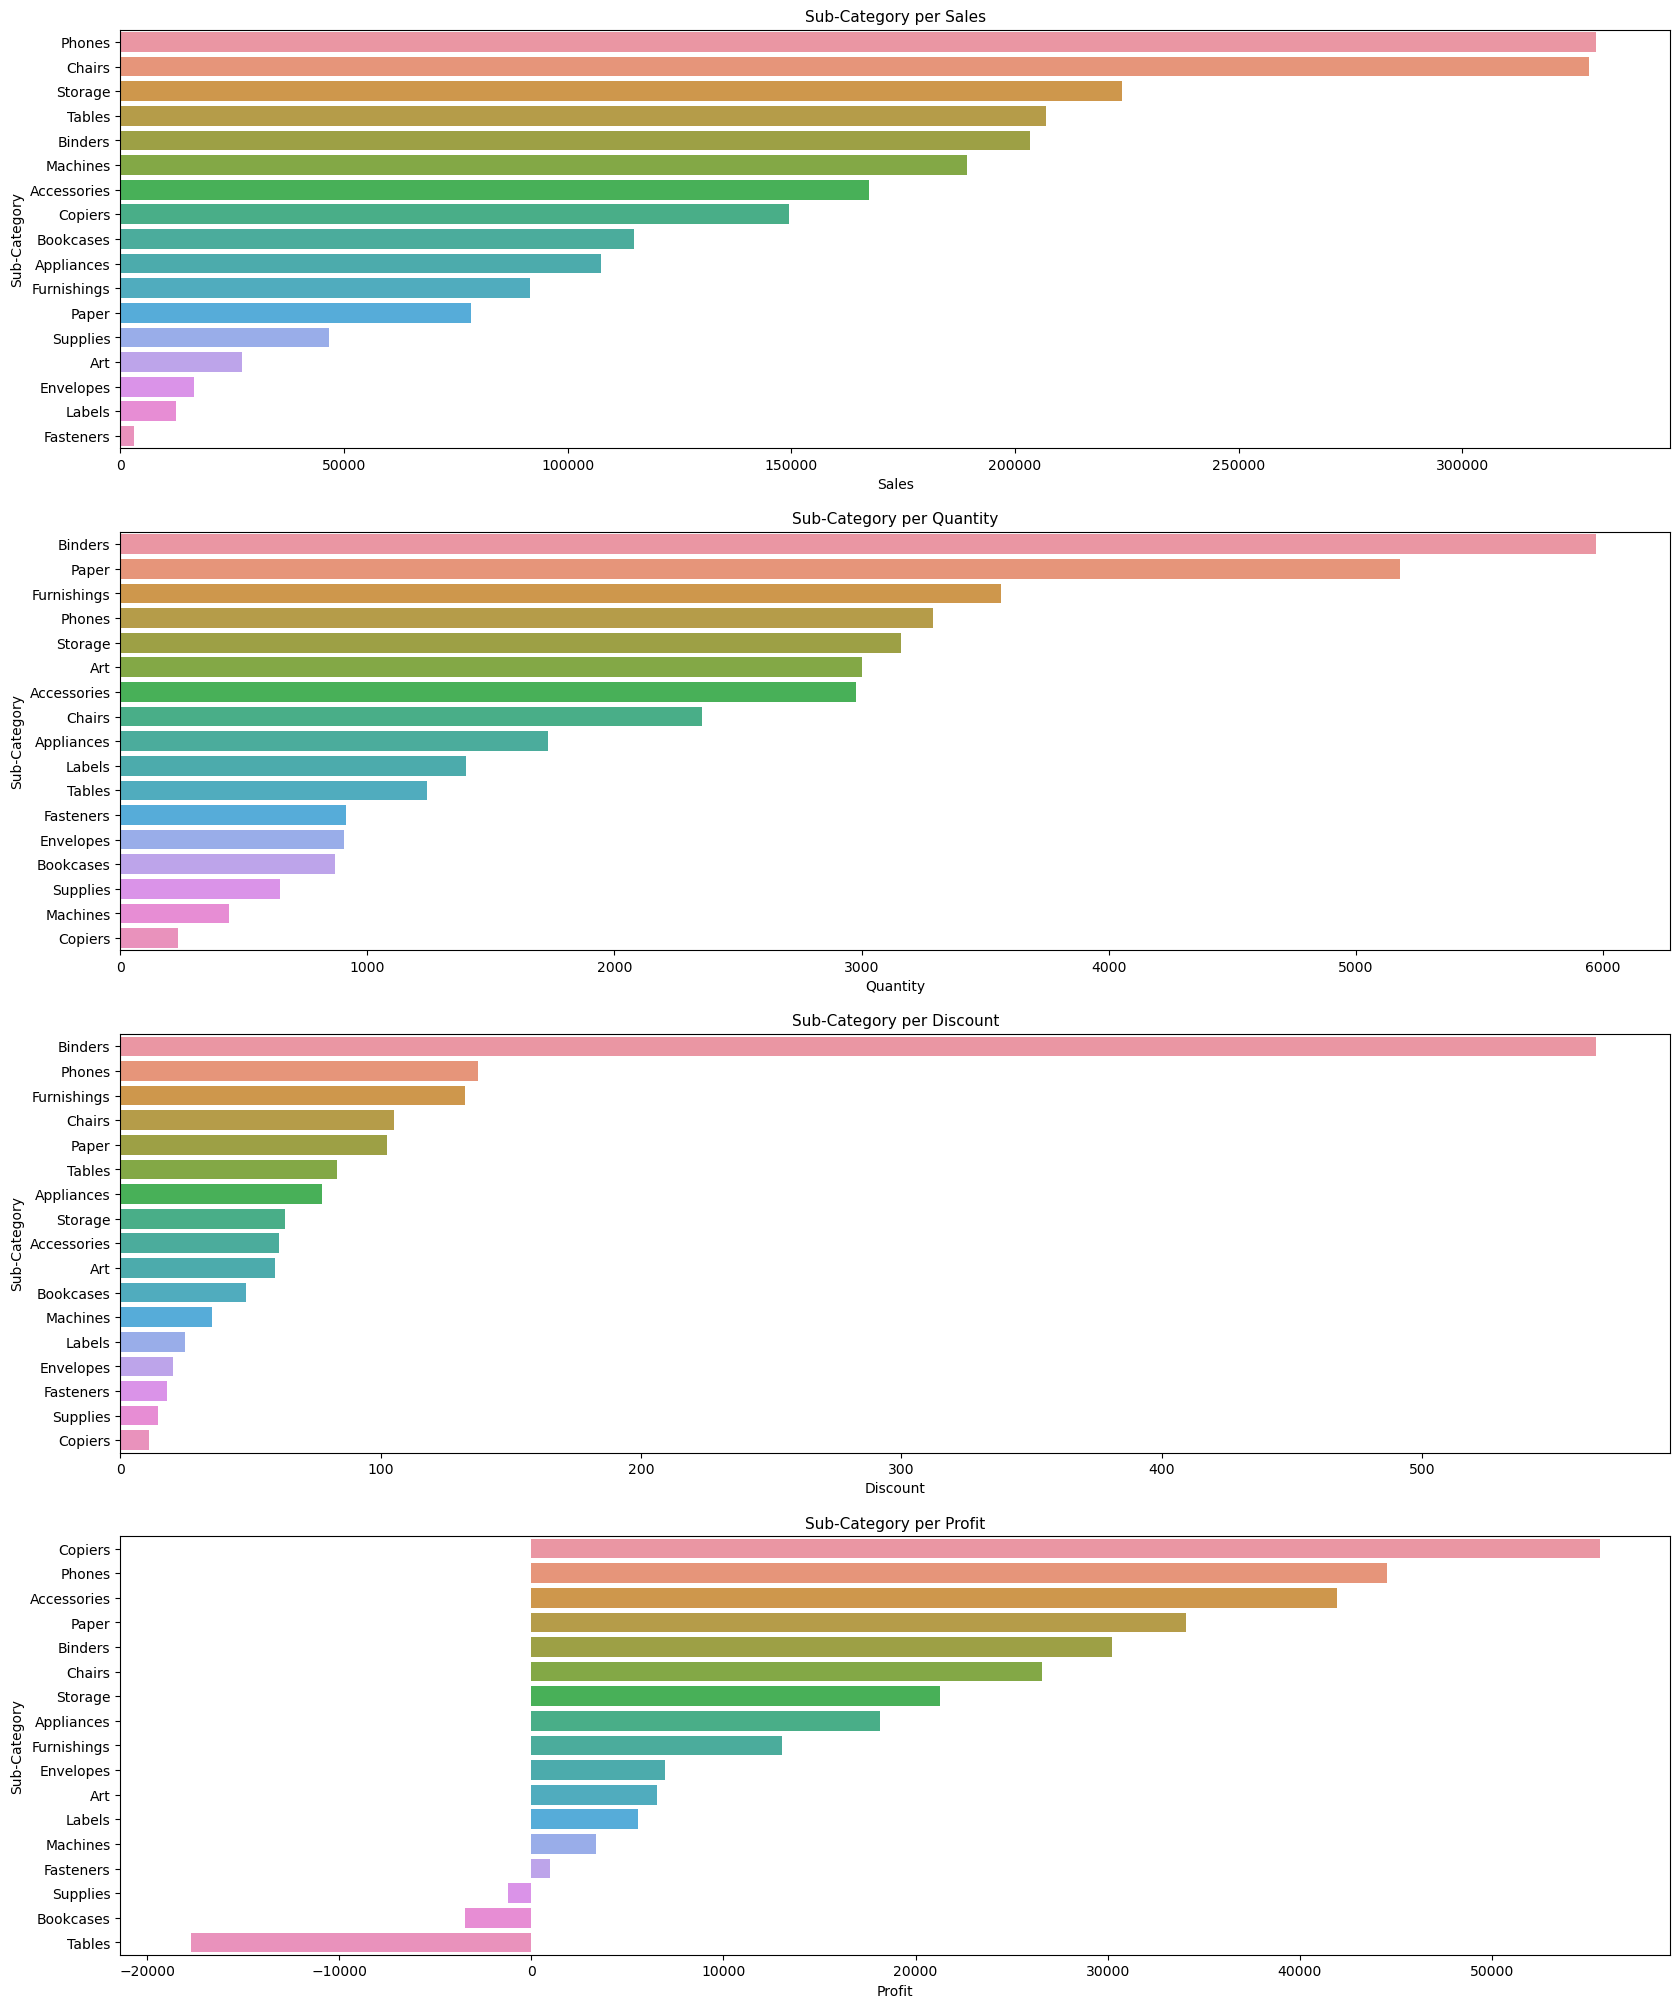

In [20]:
plt.figure(figsize=(20,25))
plot = 1
for i in ['Sales','Quantity','Discount','Profit'] :
    if plot <= 4:
        ax = plt.subplot(4,1,plot)
        dt = df.groupby('Sub-Category')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['Sub-Category'])
        plt.title('Sub-Category per {}'.format(i) , fontsize=11)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Sub-Category' , fontsize=10)
    plot +=1
plt.show()    

- Phones are the most sold goods with the second highest profit over 40000 saying that it is very essential for consumers by the way desite of its low discounts compared to its prices and chairs are the second highest sales

- discounts on Binders is the highest due to its highest provided quantities in market with high sales and profits which say it is a very popular and beloved stock

- Copiers are the highest worthy profit good among all cargos due to its high price and the lowest discount despite of its lowest provided quantity in the market but it still  very high on demand commodity

- Tables has the worst profit despite of its high sales relatively because of it very low price as it is a common and very old classic stock

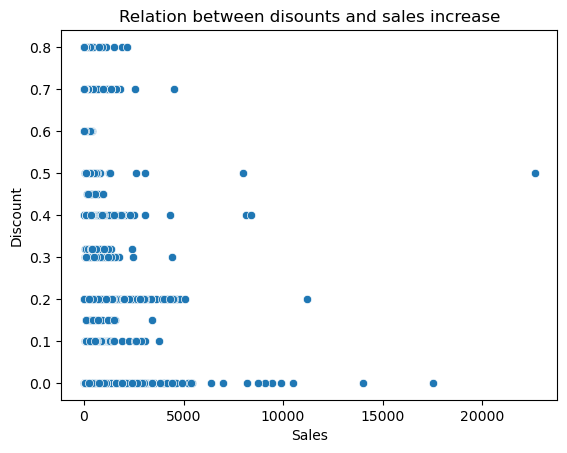

In [21]:
sns.scatterplot(x=df['Sales'] , y=df['Discount'])
plt.title('Relation between disounts and sales increase')
plt.show()

The less there are discounts the more sales are being achieved